In [402]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path

In [403]:
path = Path.home().joinpath("diaz_rincon/VTA_SNc")
folder_path = "traces"

In [404]:
traces_path = list(Path(path).joinpath(folder_path).iterdir())
traces_path

[PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys002_03_07_vta_control.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys031_03_07_vta_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys017_03_05_snc_control.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys013_03_04_snc_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys002_03_04_snc_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys017_03_04_snc_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys009_03_02_snc_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys001_03_04_snc_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys004_03_04_snc_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys018_03_04_snc_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/traces/gc_ephys027_03_07_vta_injected.npy'),
 PosixPath('/home/ic3/diaz_rincon/VTA_SNc/tra

In [405]:
traces = {}
for iter, file_name in enumerate(traces_path):
    traces[iter] = np.load(file_name, allow_pickle=True)    

In [406]:
traces.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [407]:
for i in range(len(traces)):
    print(traces[i].shape)

(42, 2250)
(25, 2250)
(49, 2250)
(23, 2250)
(28, 2250)
(21, 2250)
(51, 2250)
(10, 750)
(16, 2249)
(21, 2250)
(27, 2250)
(37, 2764)
(28, 2250)
(37, 2250)
(13, 2250)
(31, 2250)
(20, 2250)
(49, 2250)
(55, 2250)
(34, 2250)
(10, 750)
(43, 2250)
(27, 2250)
(27, 2250)
(24, 2250)
(32, 2250)
(31, 2250)
(19, 1019)
(28, 2250)
(39, 2250)
(17, 3000)
(67, 2250)
(38, 2250)
(34, 2250)


## Plotting Cells

In [408]:
# for i in range(len(traces)):
#     frames_per_second = 25
#     num_cells = traces[i].shape[0]
#     samples = traces[i].shape[1]
#     duration = samples / frames_per_second
#     time = np.arange(start = 0, stop=int(duration), step=1/frames_per_second)
    
#     # Plot the traces
#     fig, axs = plt.subplots(num_cells, figsize=(20, 40))
#     for cell_num in range(num_cells):
#         axs[cell_num].autoscale(enable=None, axis="x", tight=True)
#         # axs[cell_num].set_ylabel(f"ROI {cell_num}", rotation=0)
#         axs[cell_num].title.set_text(f'ROI {cell_num + 1}')
#         # axs[cell_num].set_xlabel("Time")
#         axs[cell_num].plot(time,traces[i][cell_num, 0:len(time)])

In [409]:
corrs = {}
pvals = {}
# Correlation coefficients
for i in range(len(traces)):
    corrs[i], pvals[i] = stats.spearmanr(np.transpose(traces[i]))

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


/tmp/ipykernel_26484/2216343262.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig2 = plt.figure()


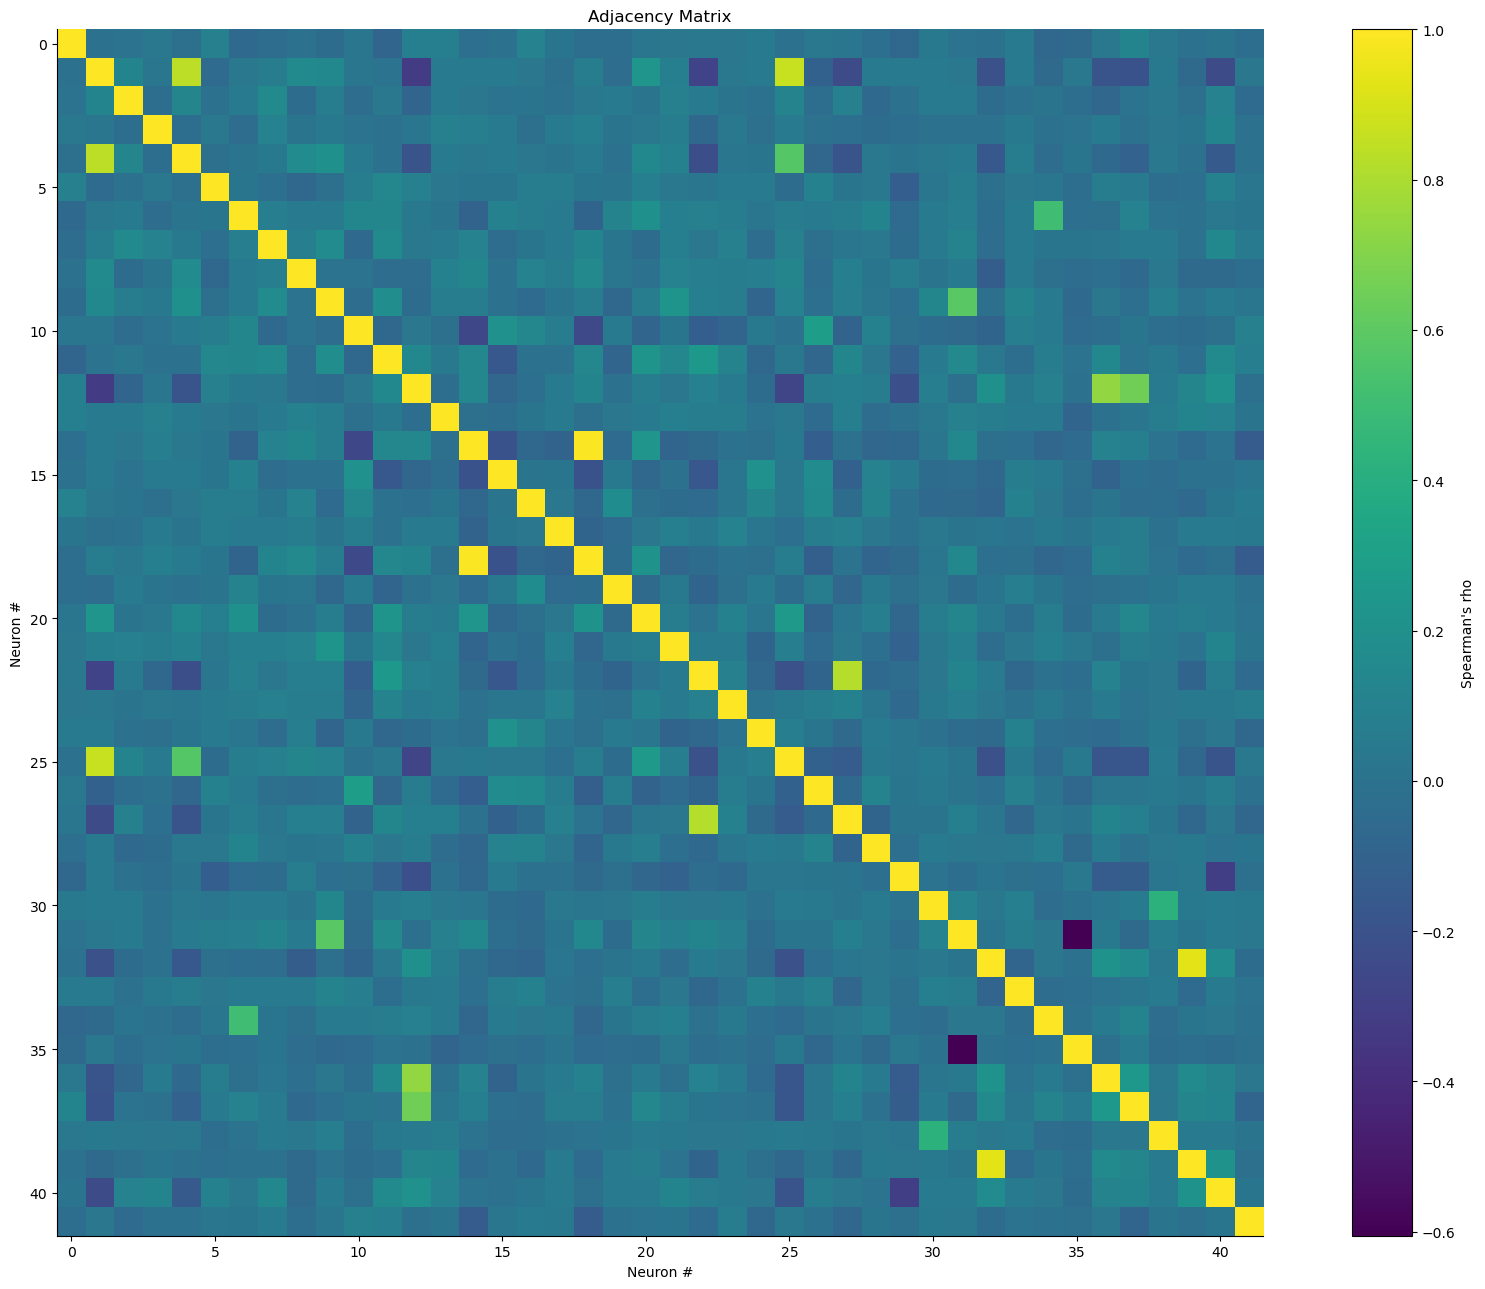

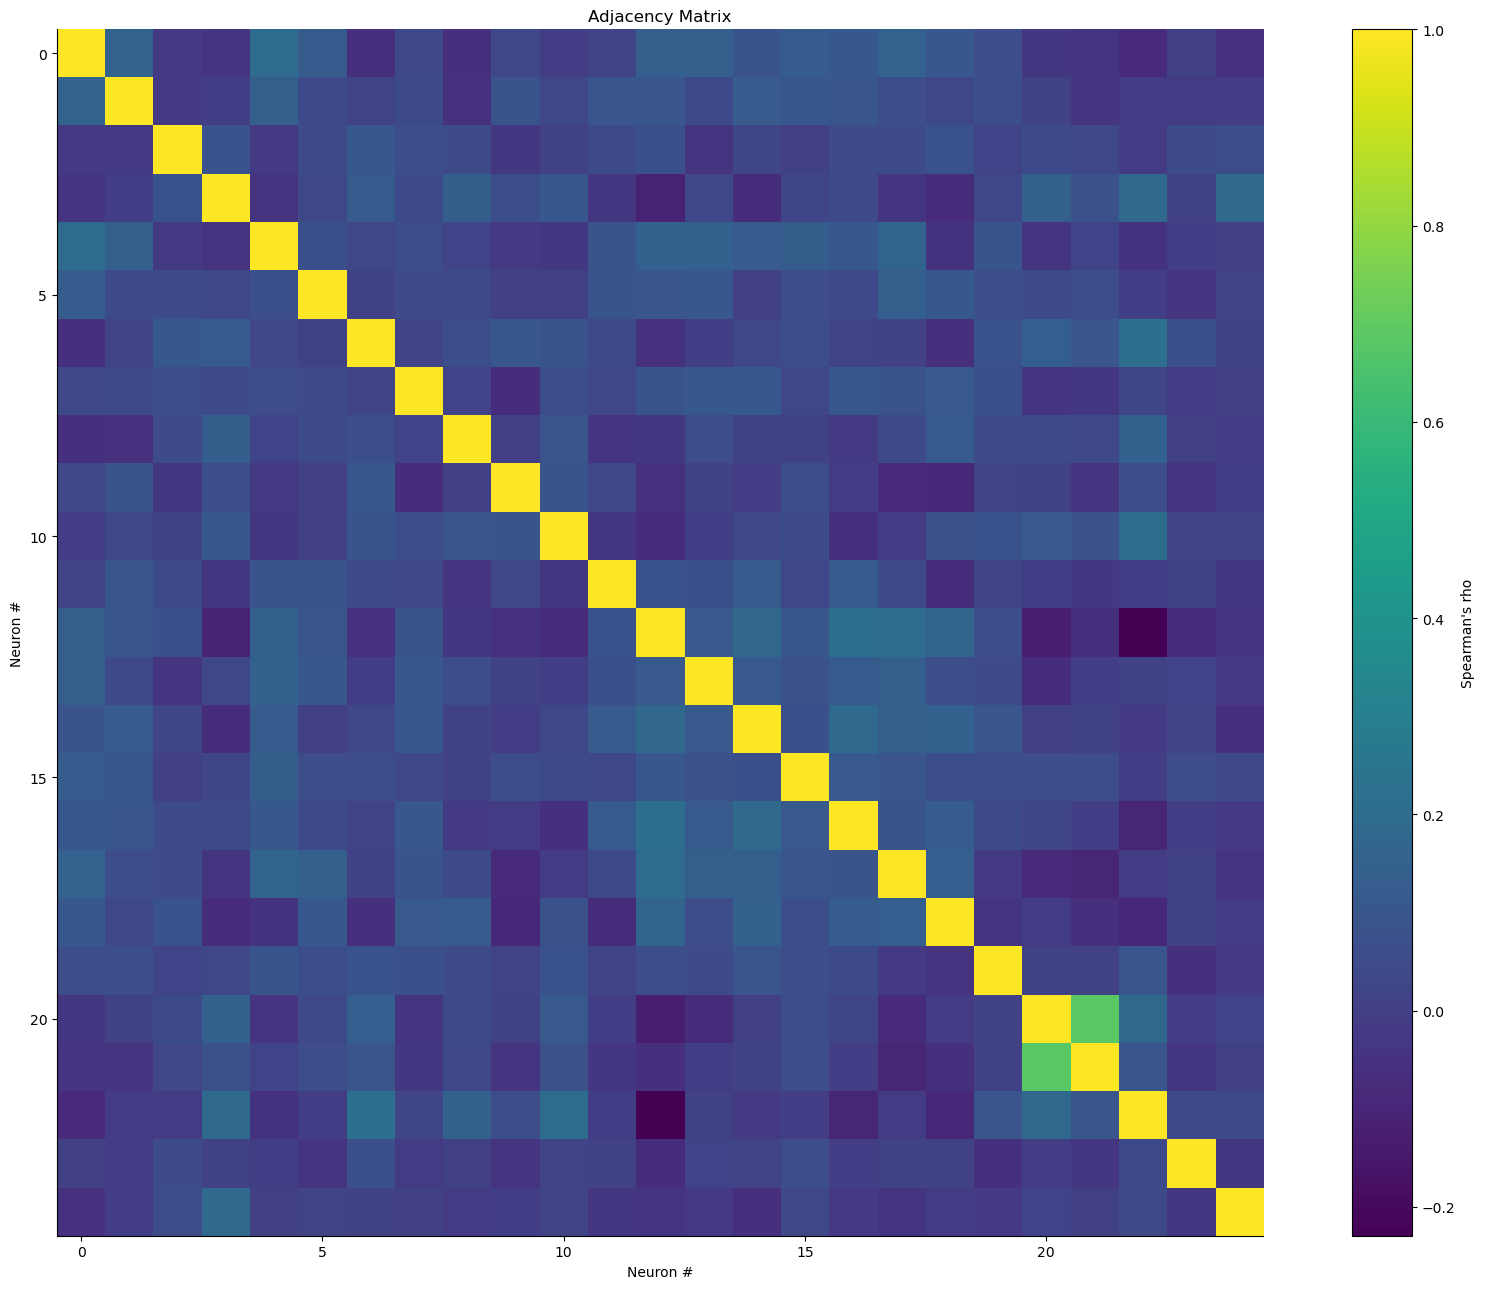

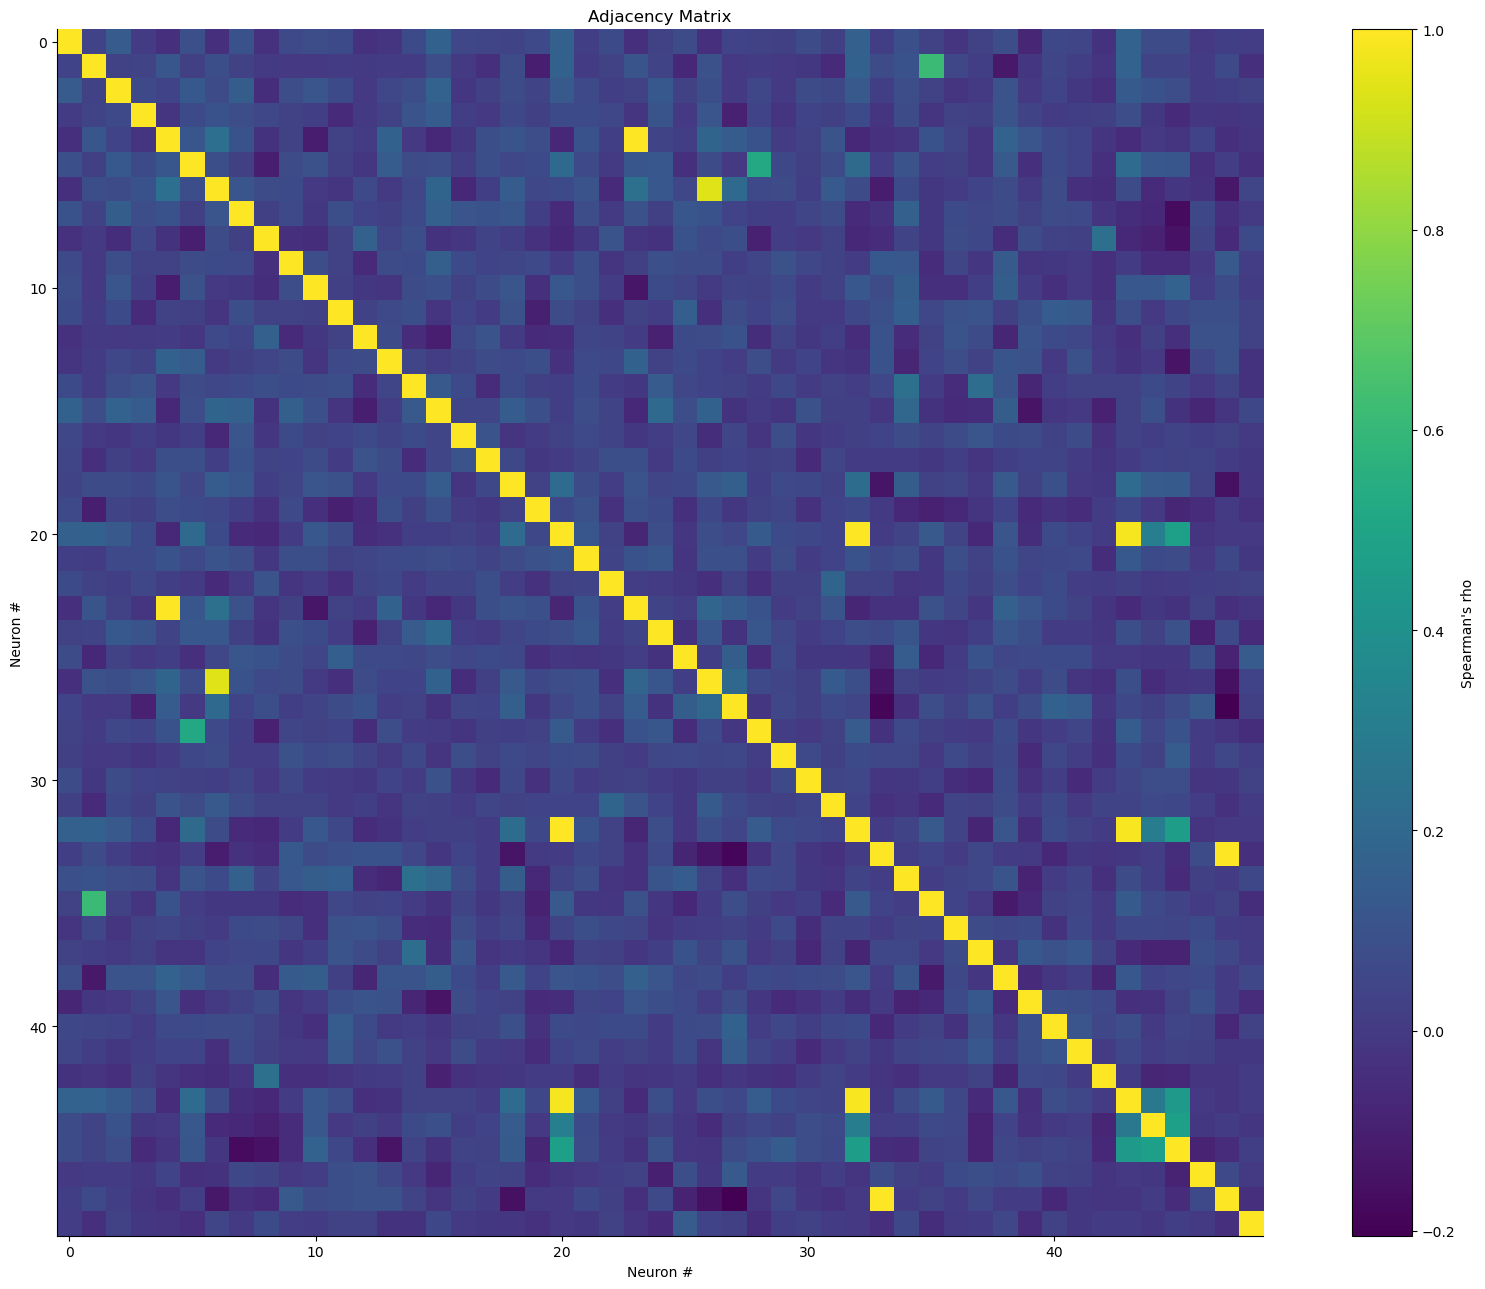

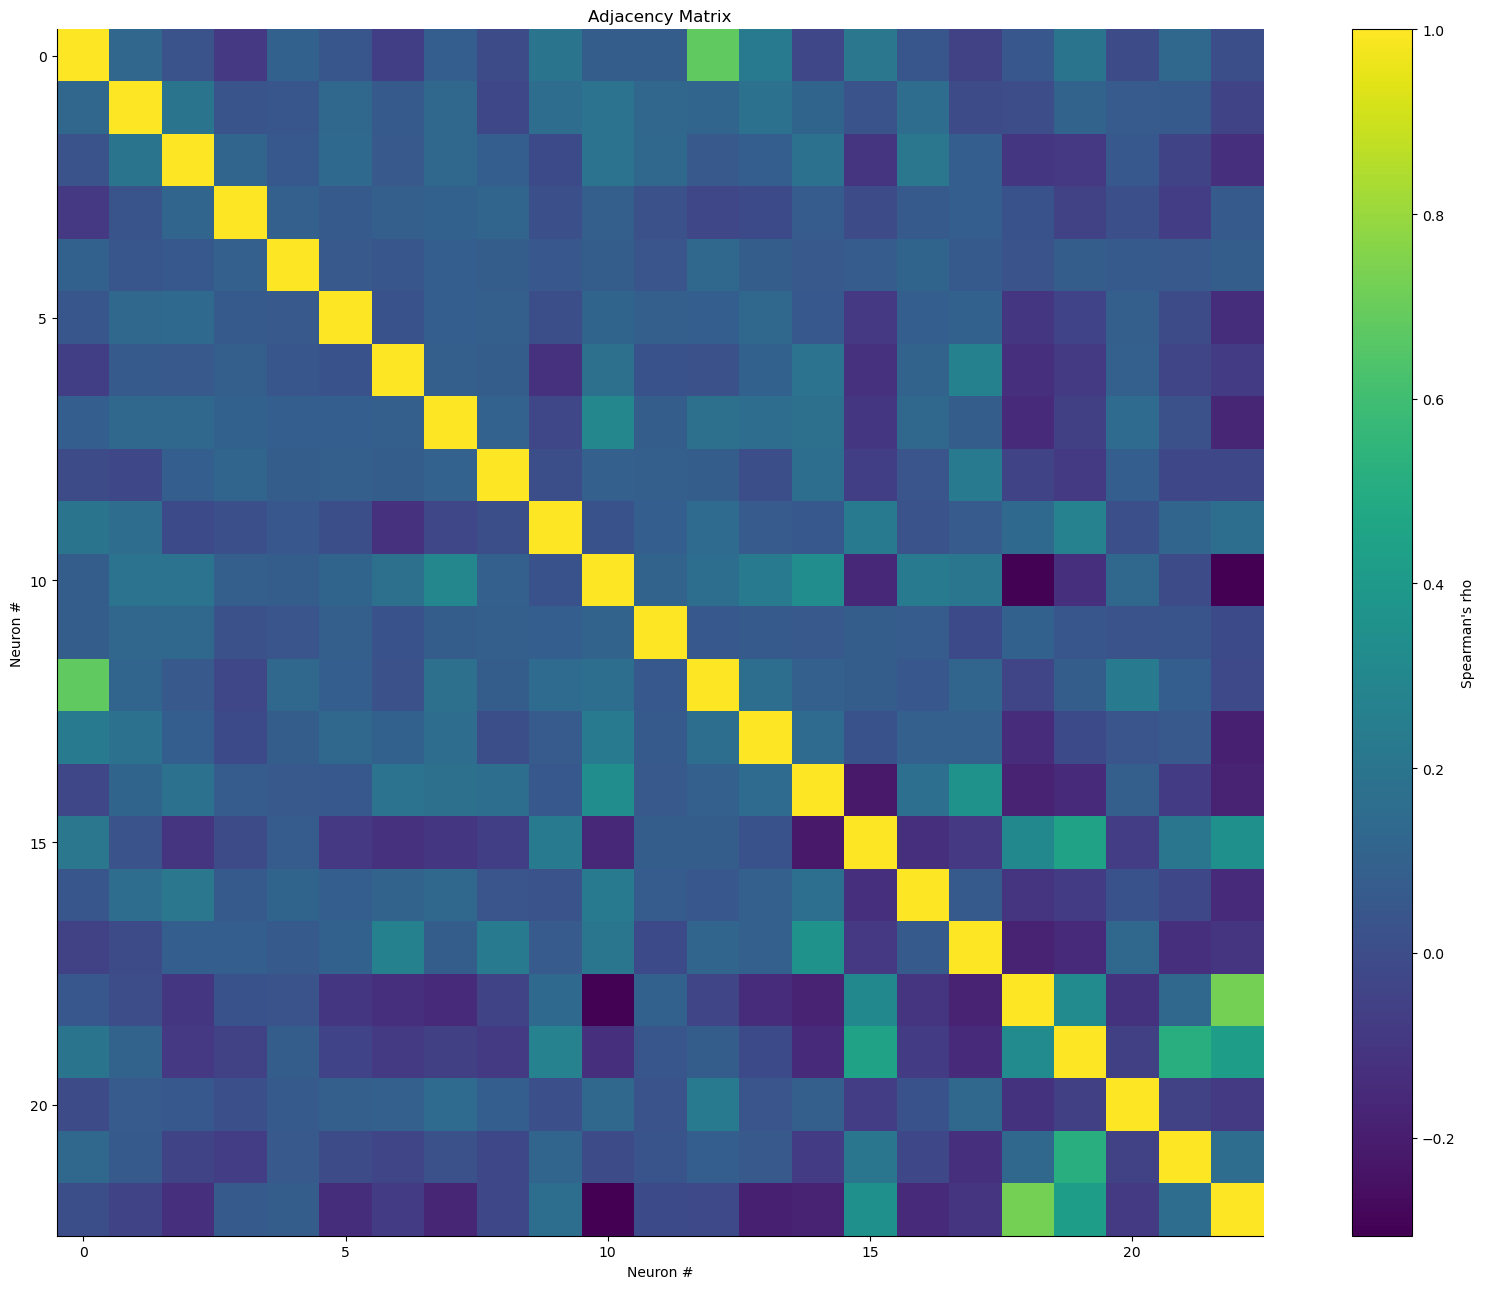

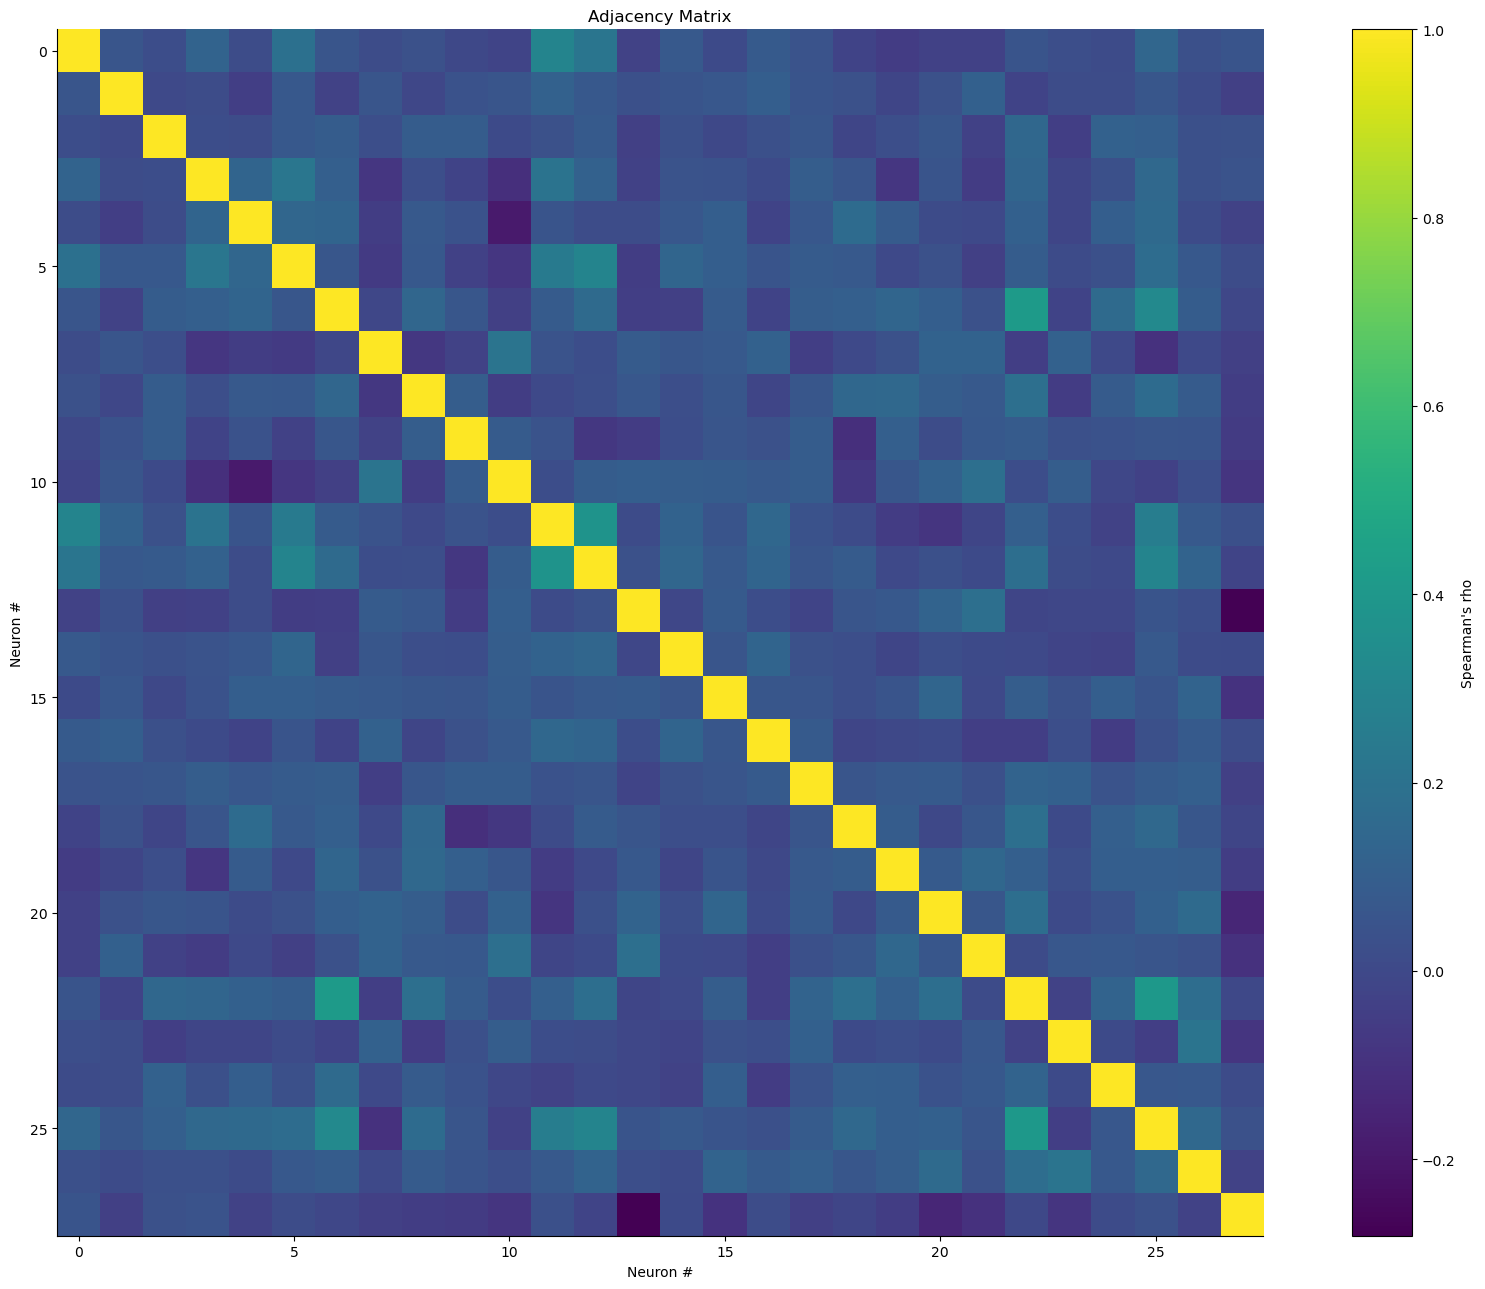

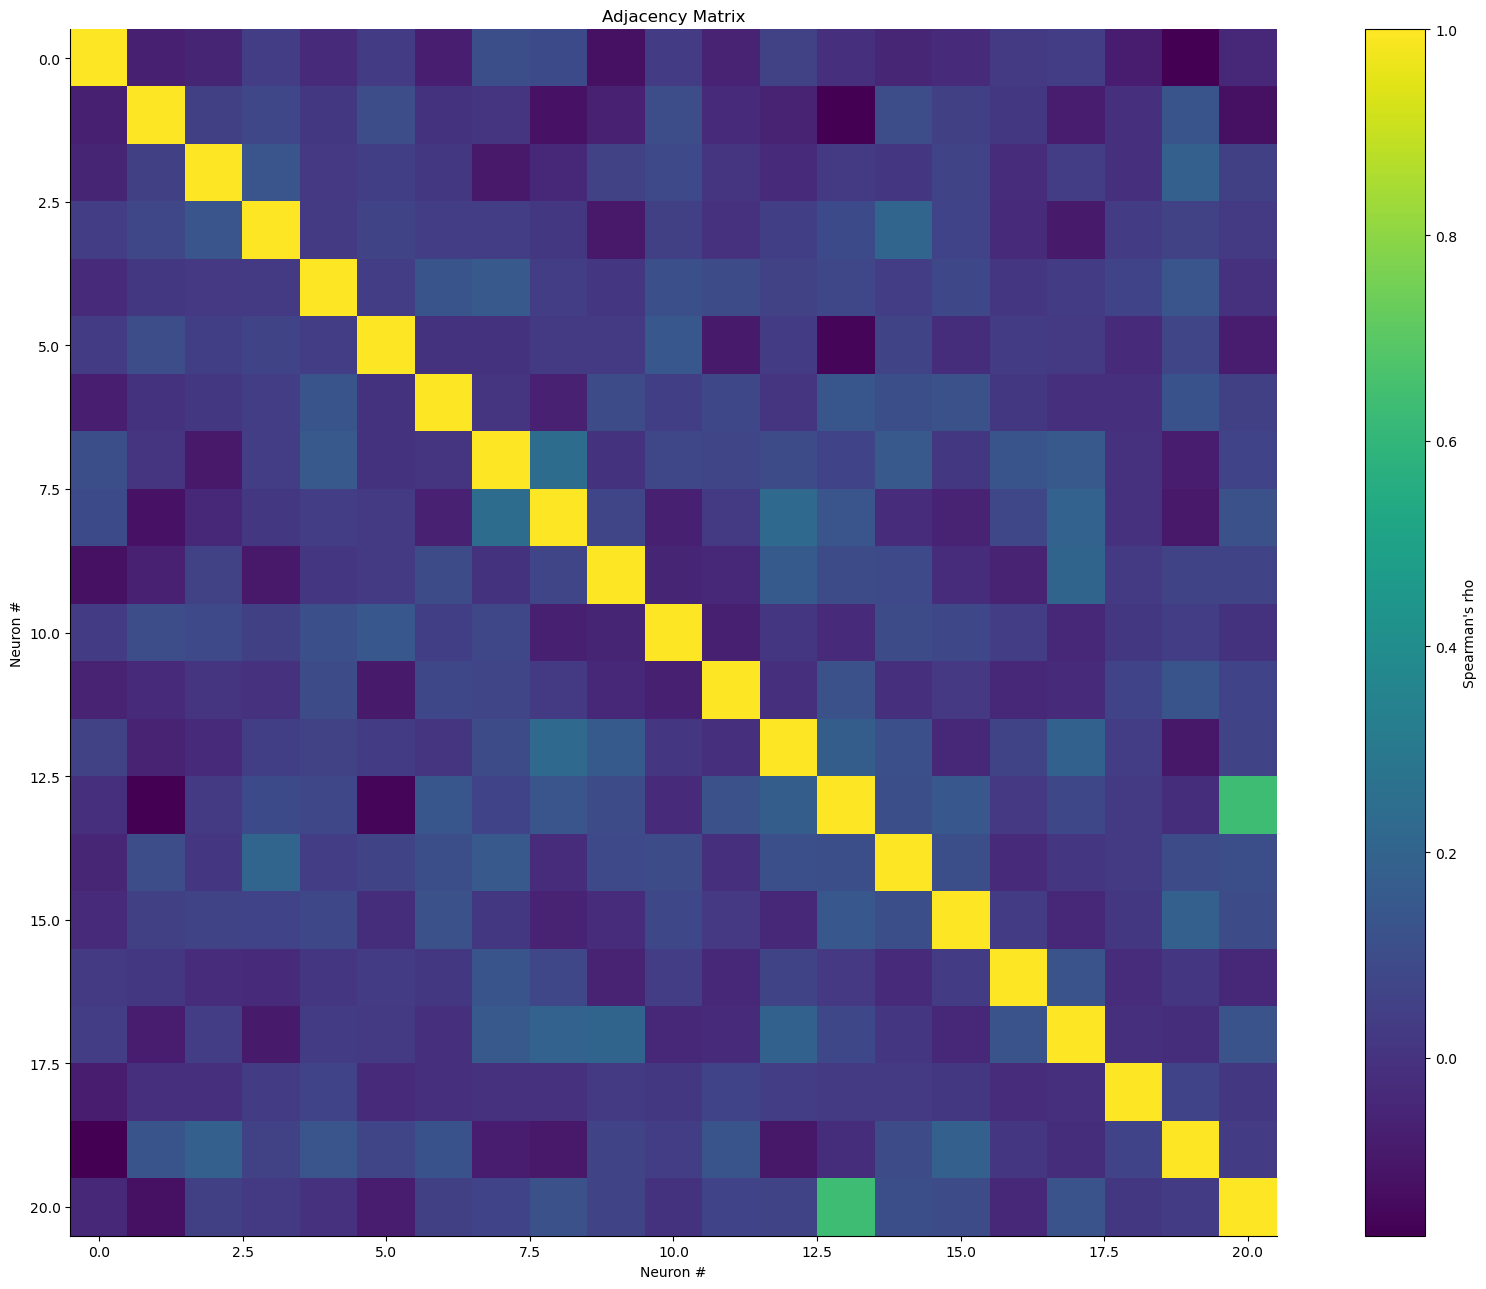

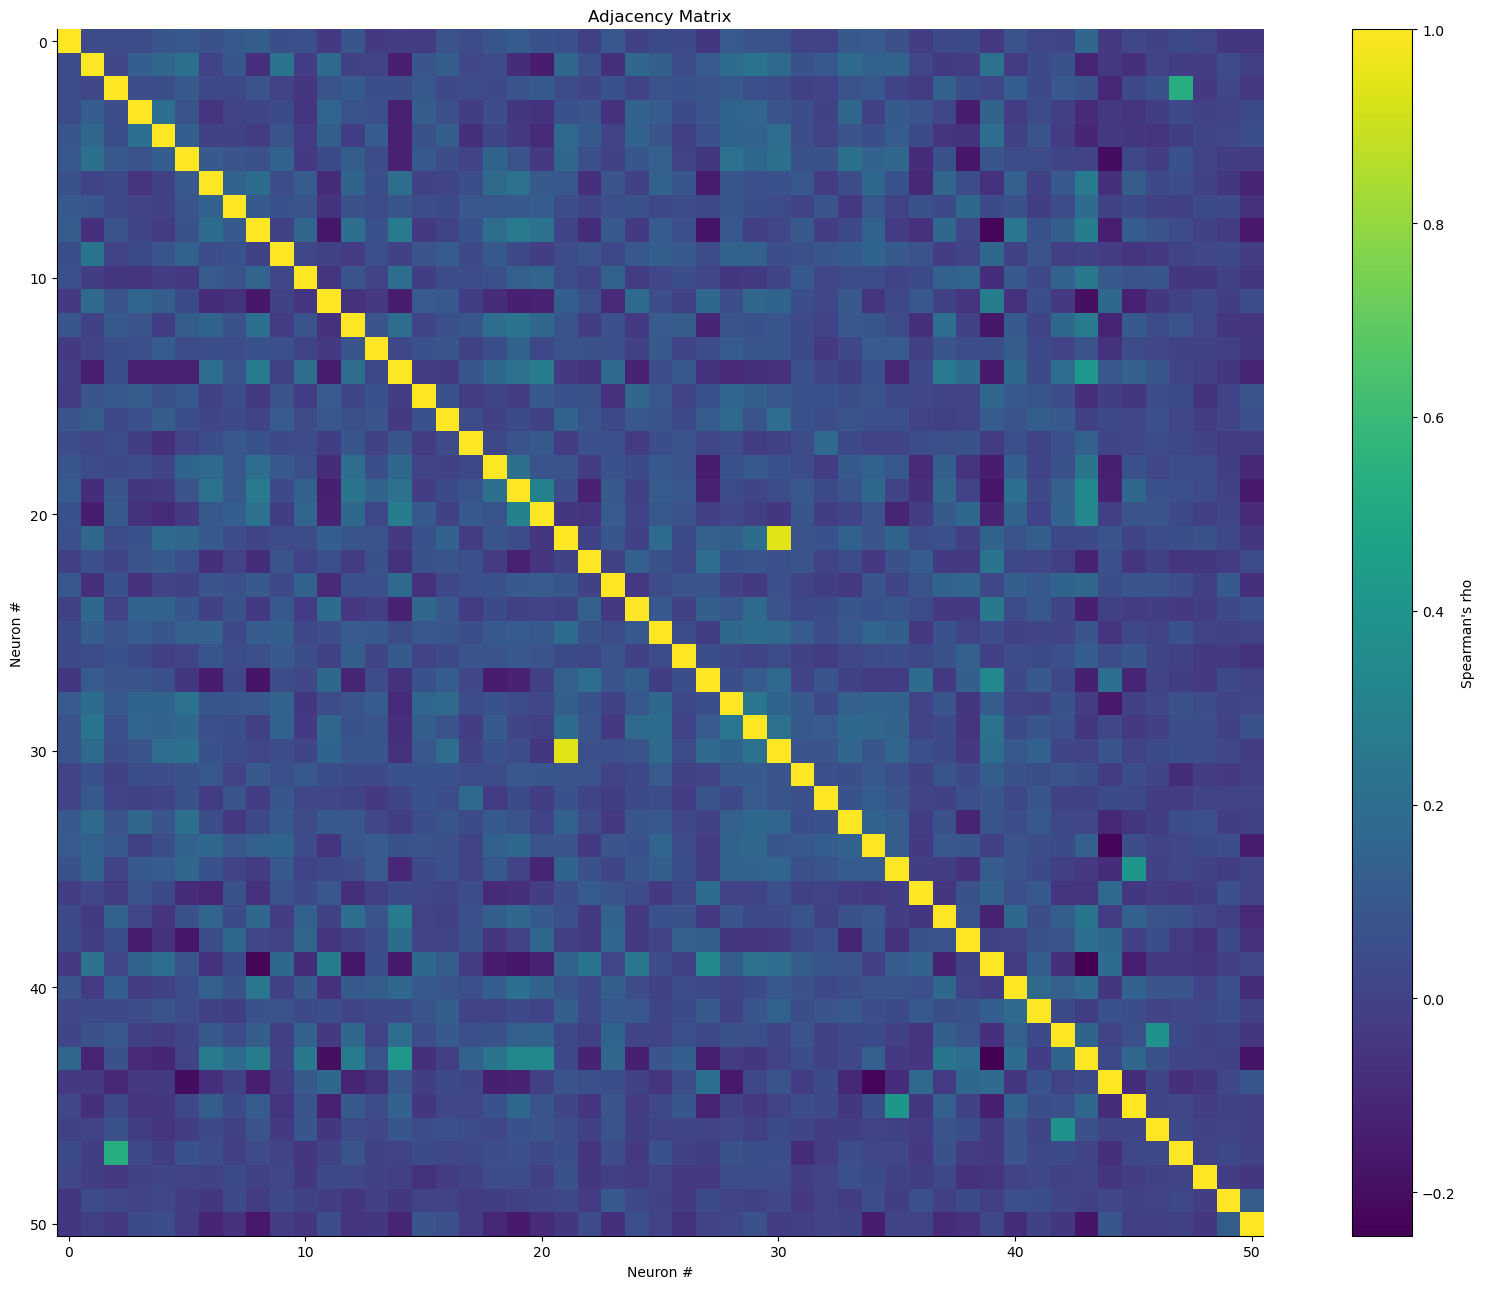

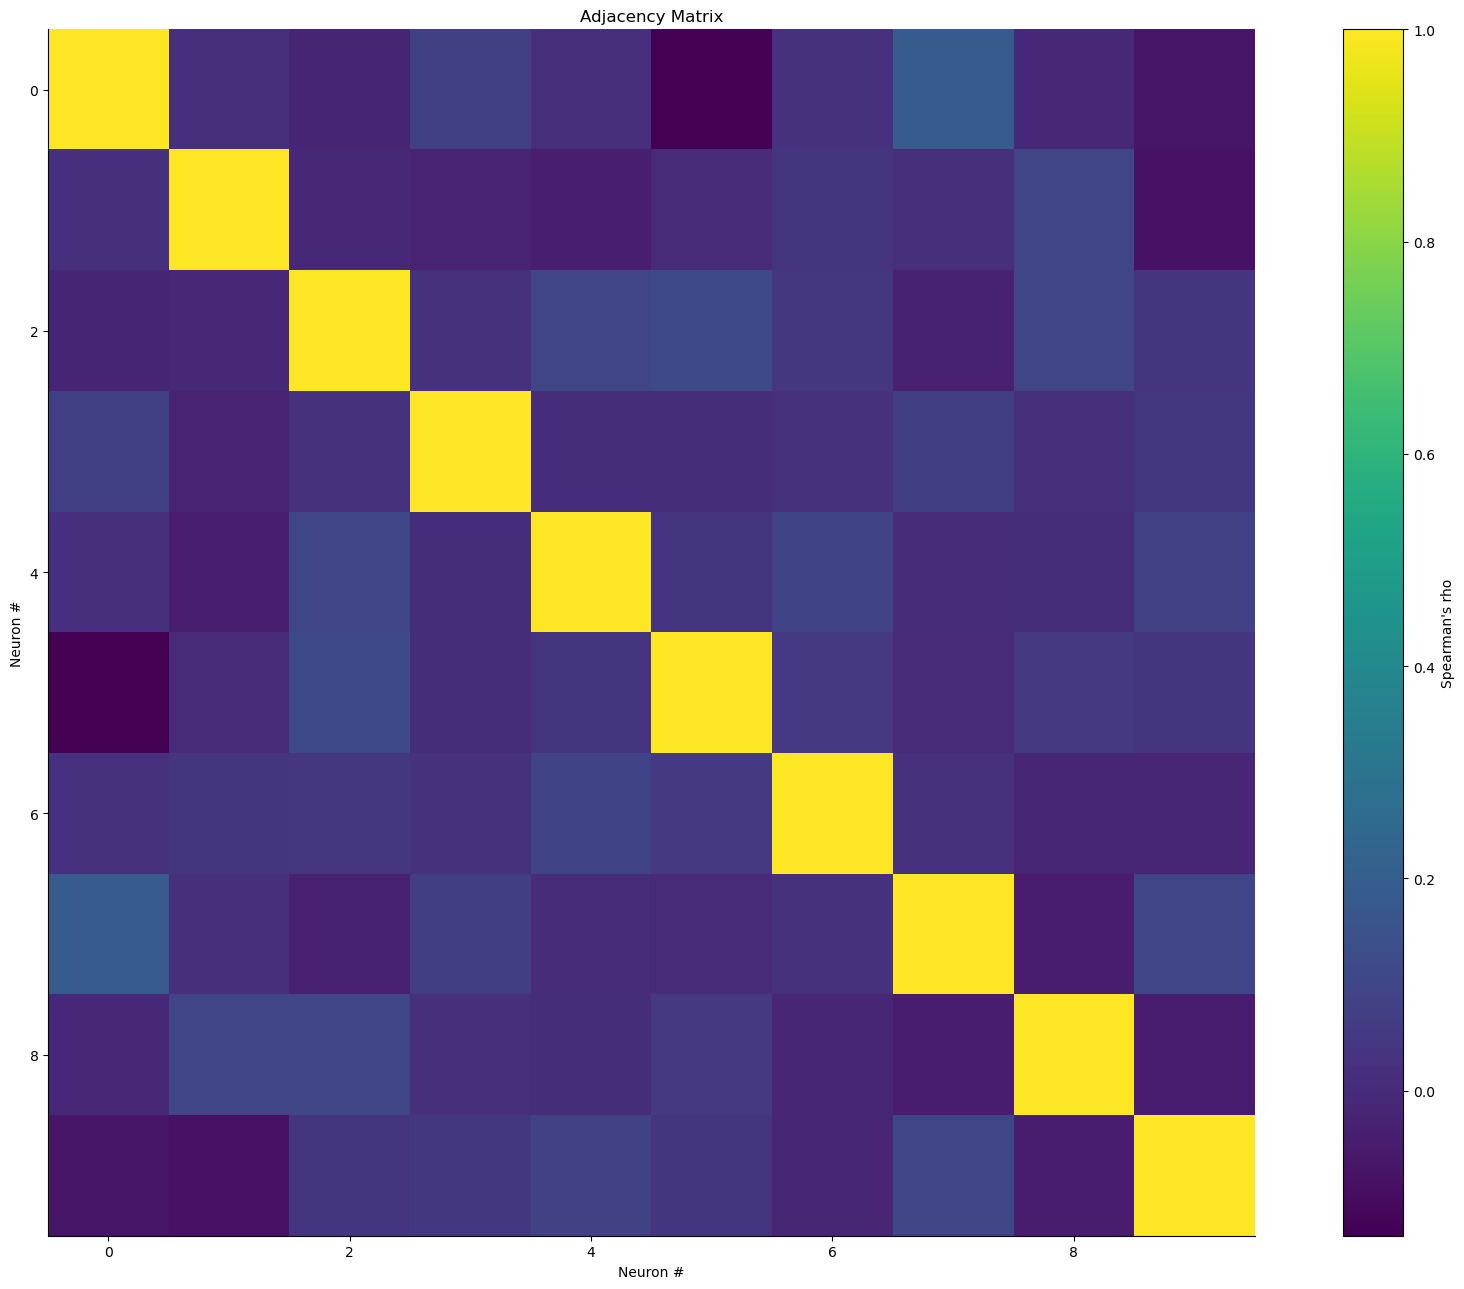

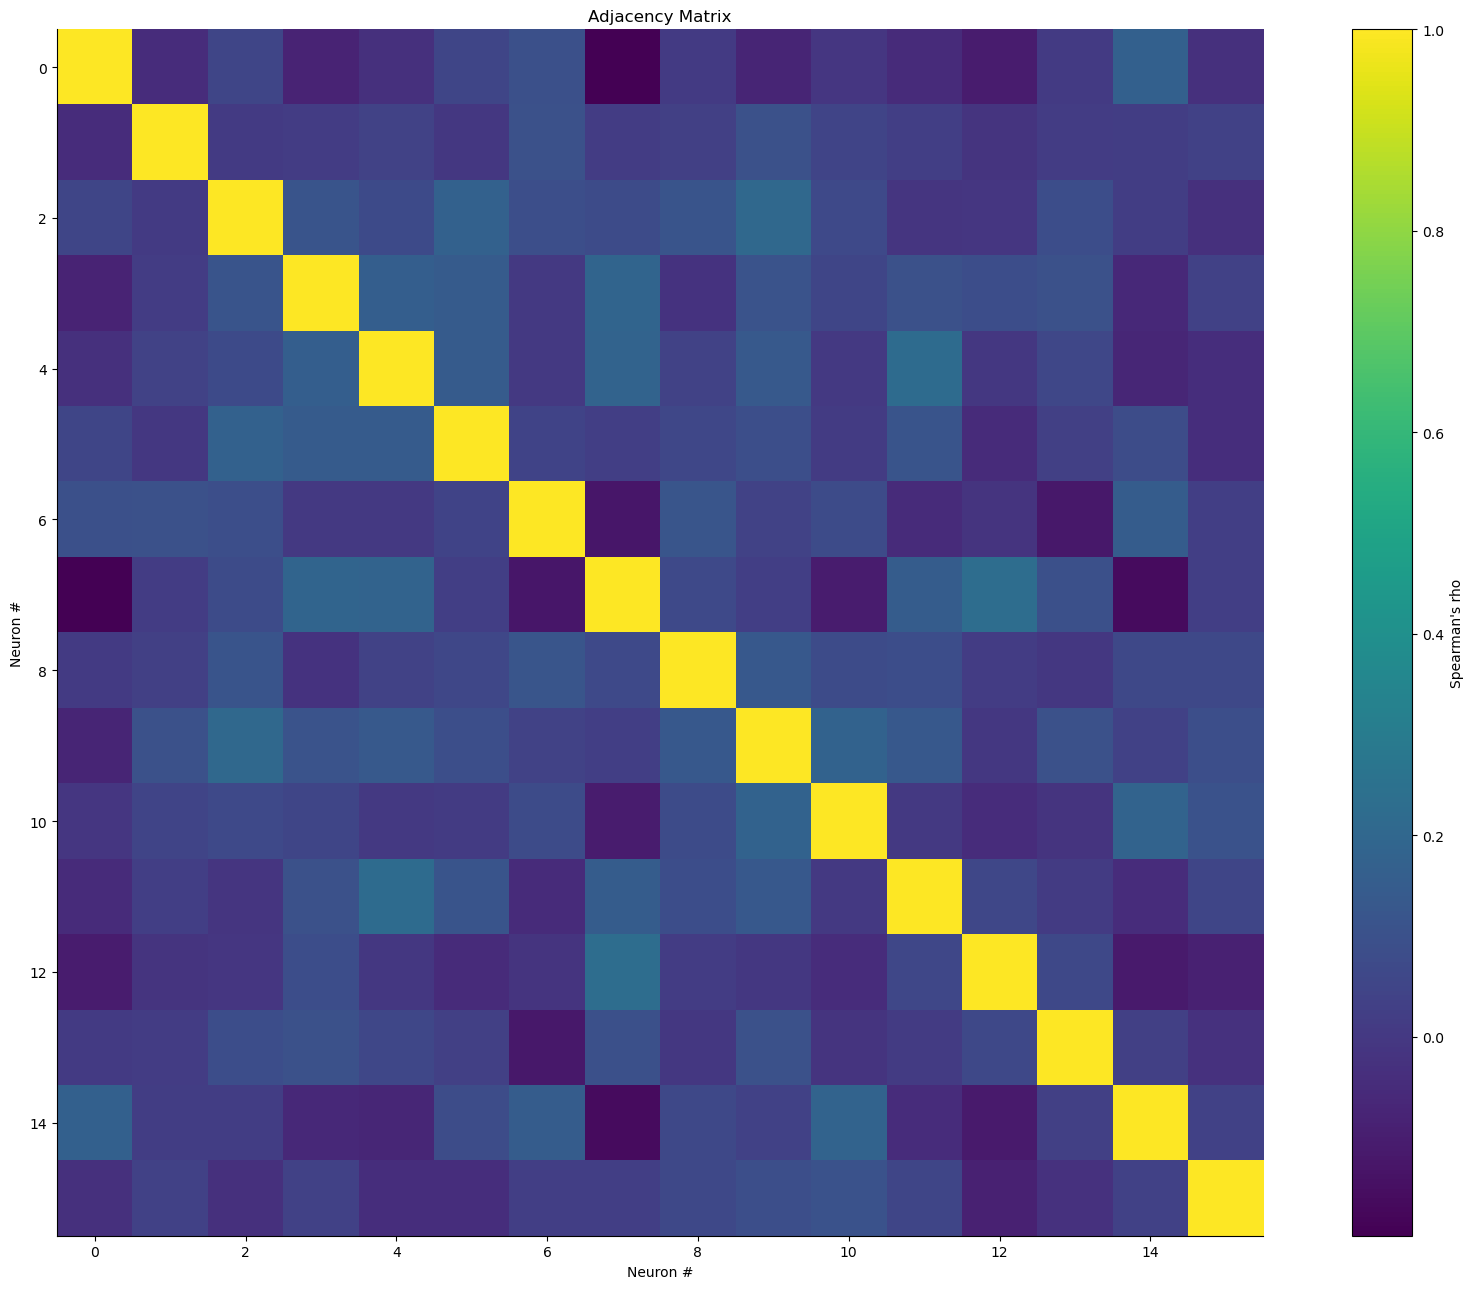

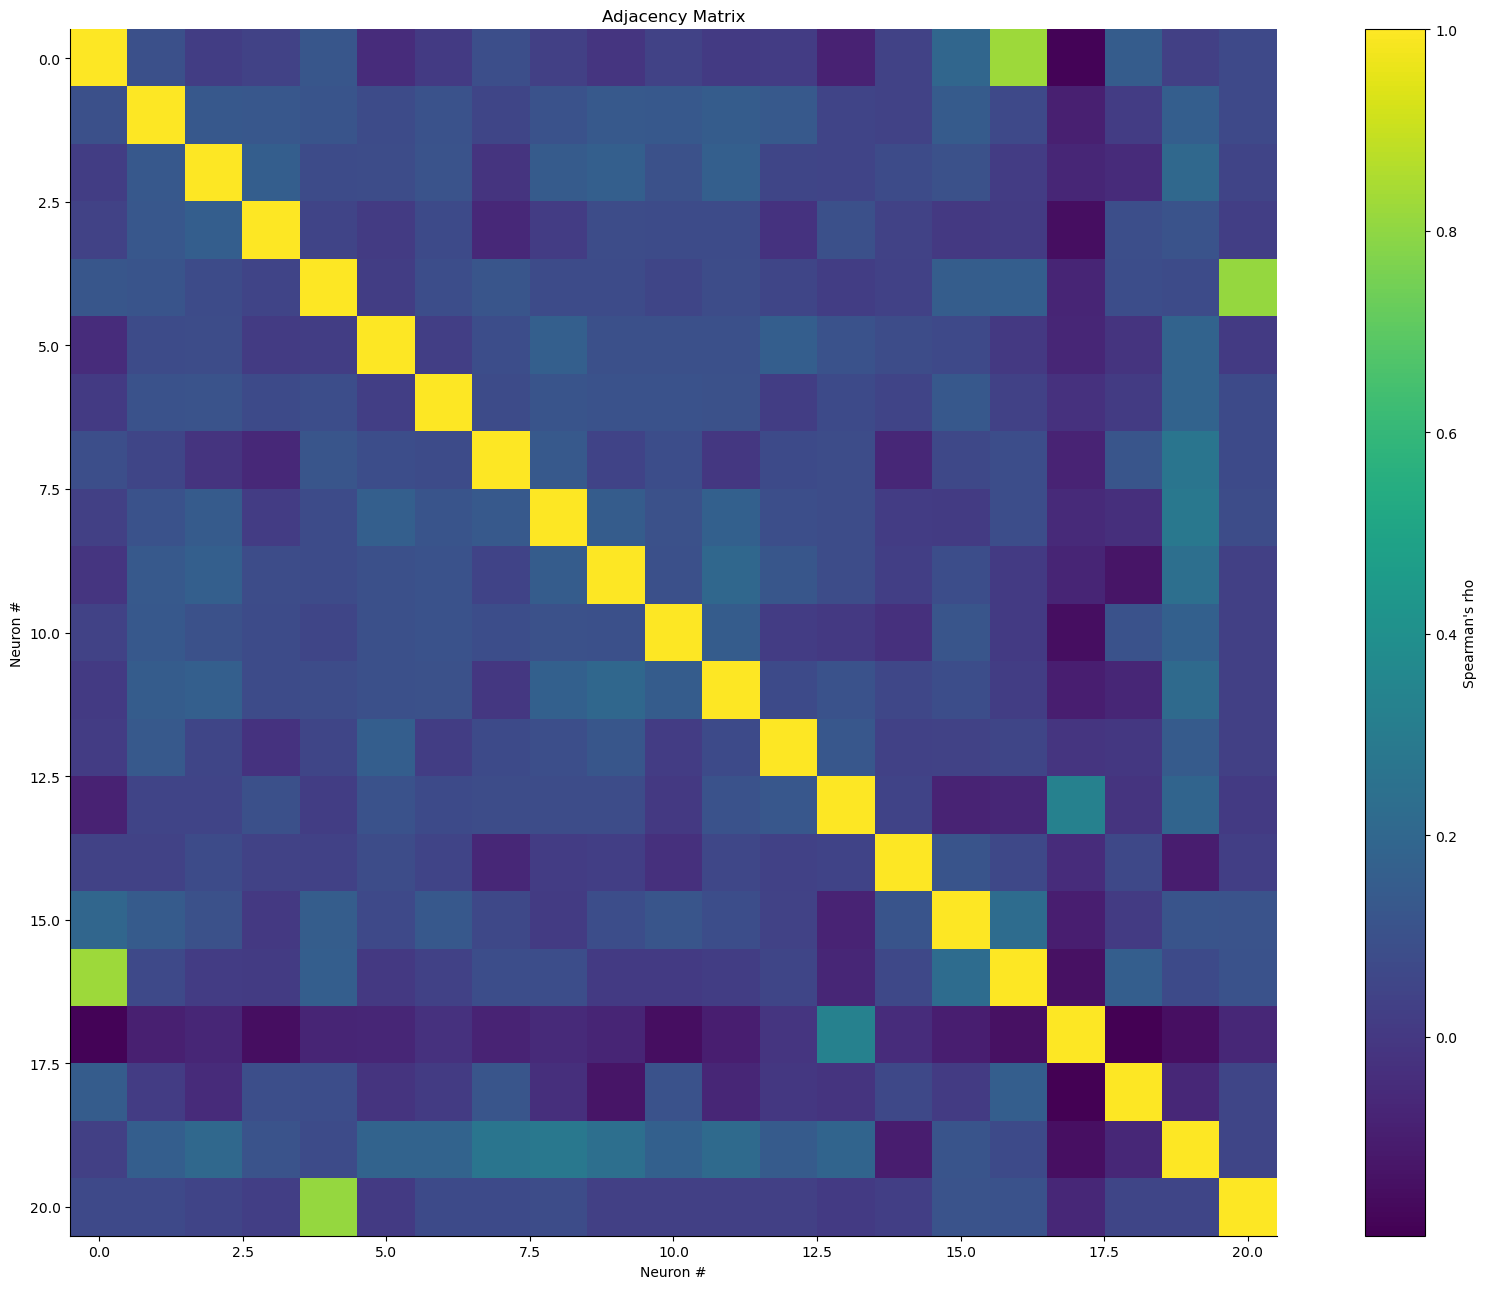

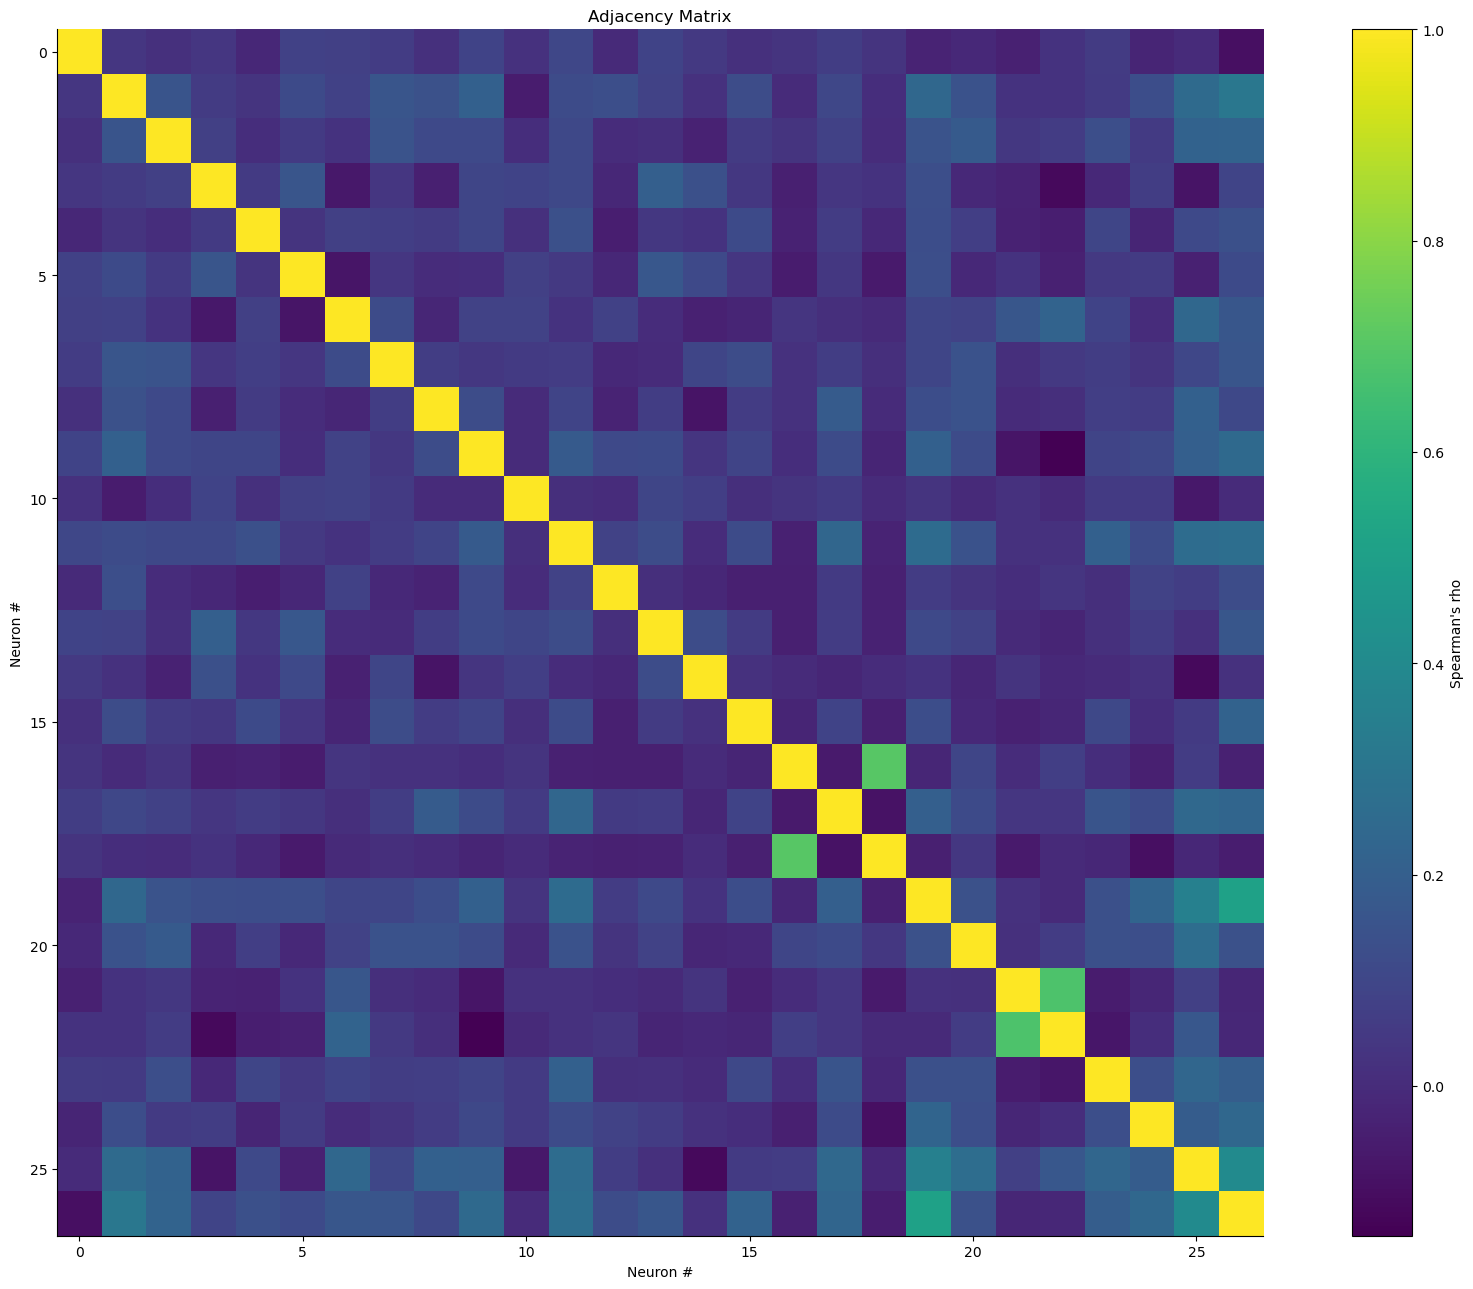

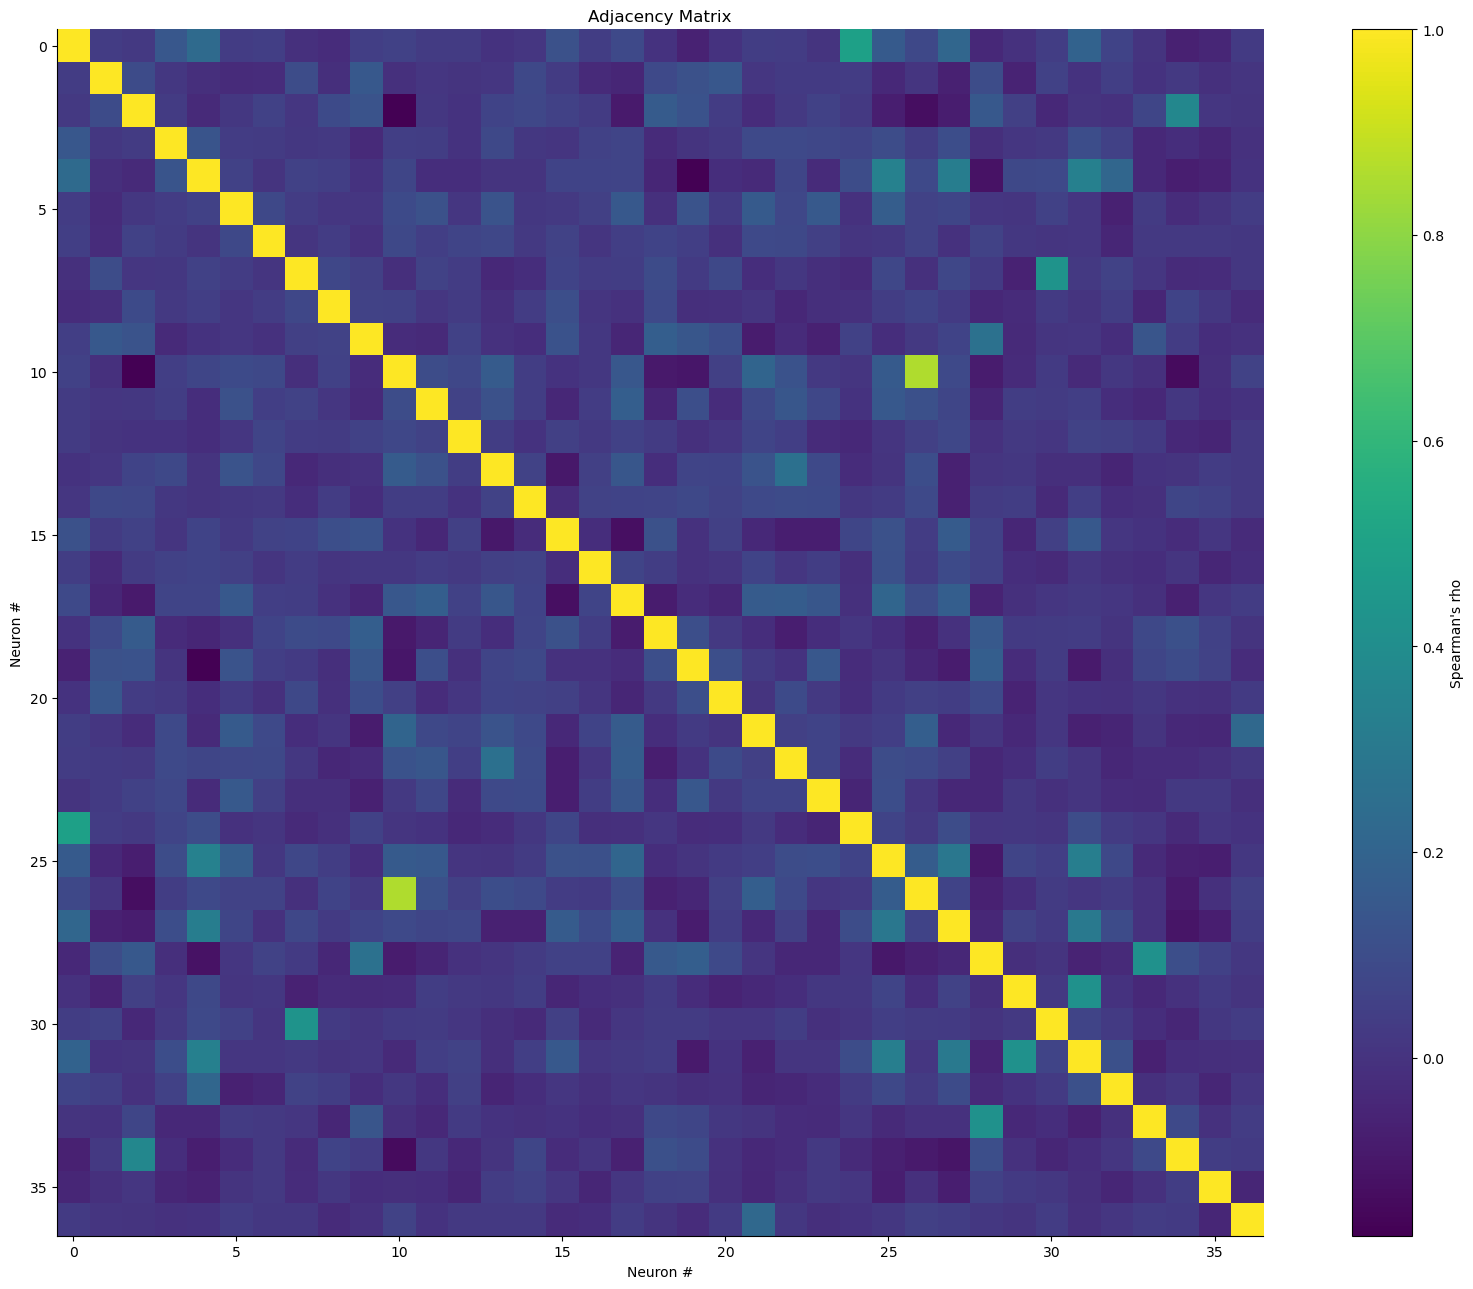

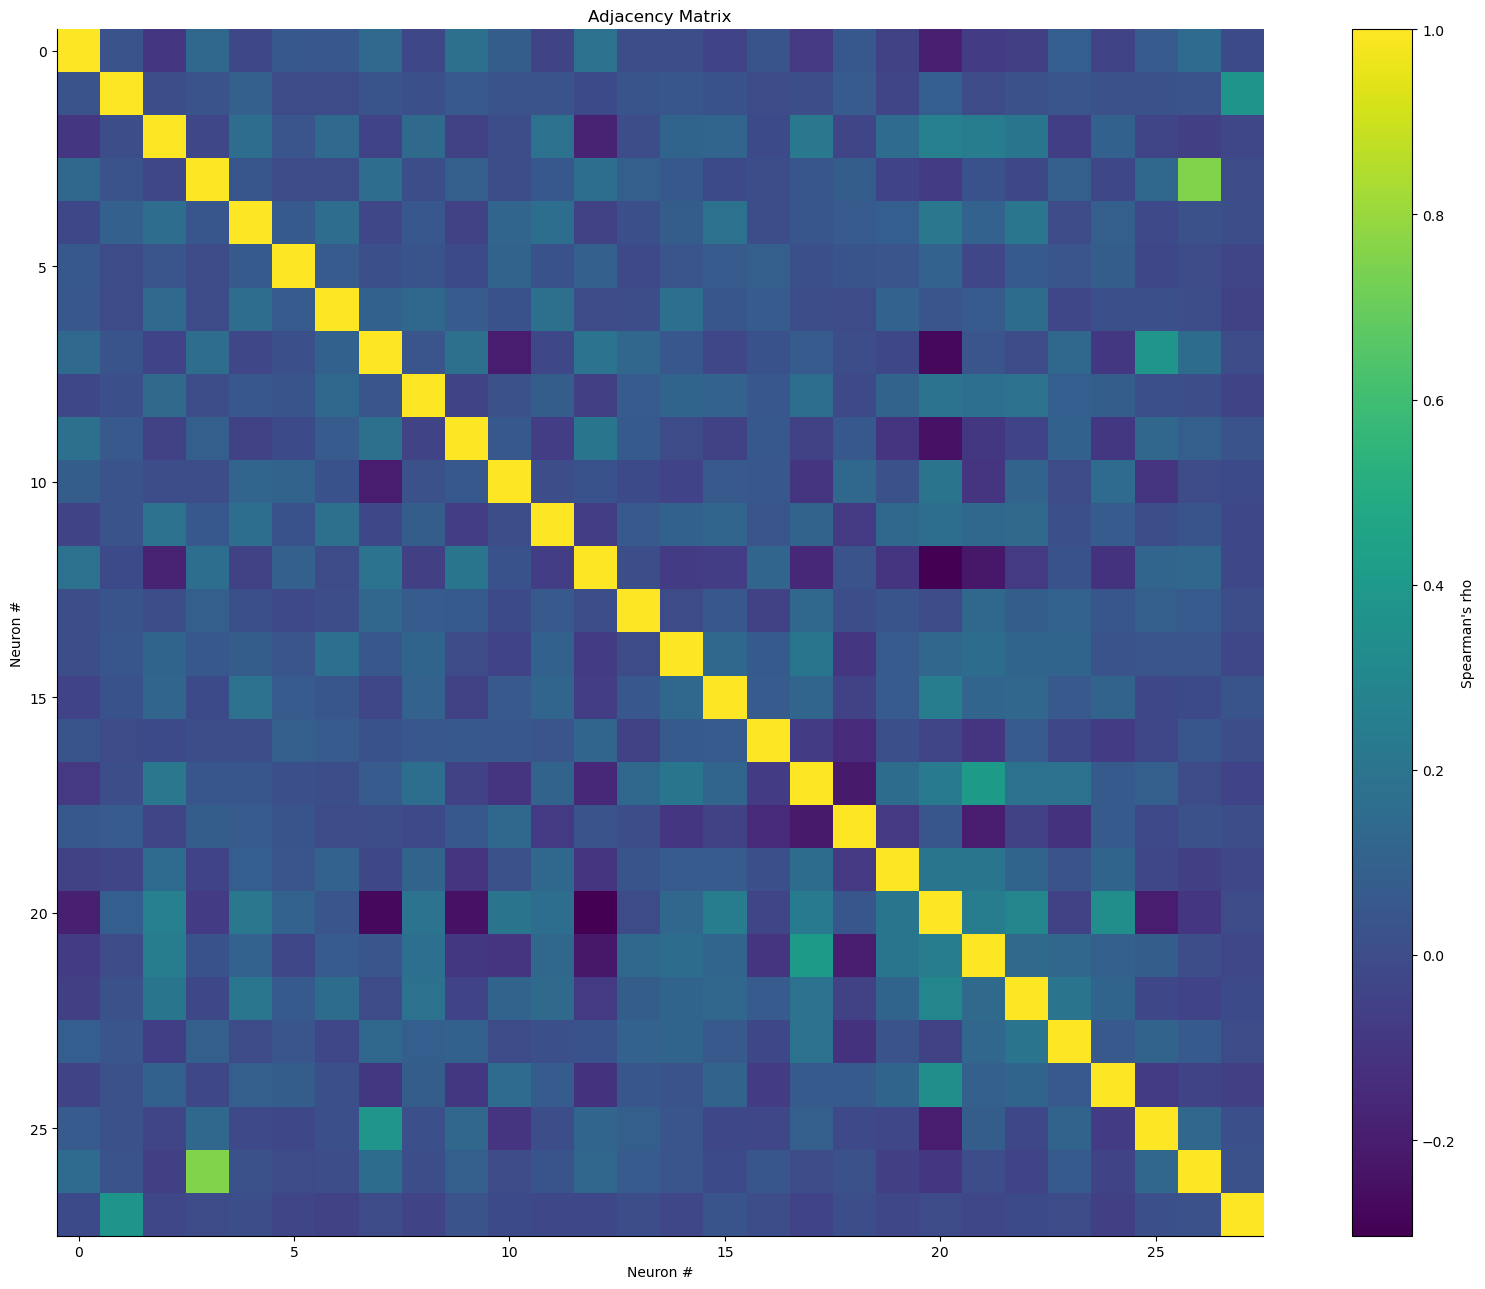

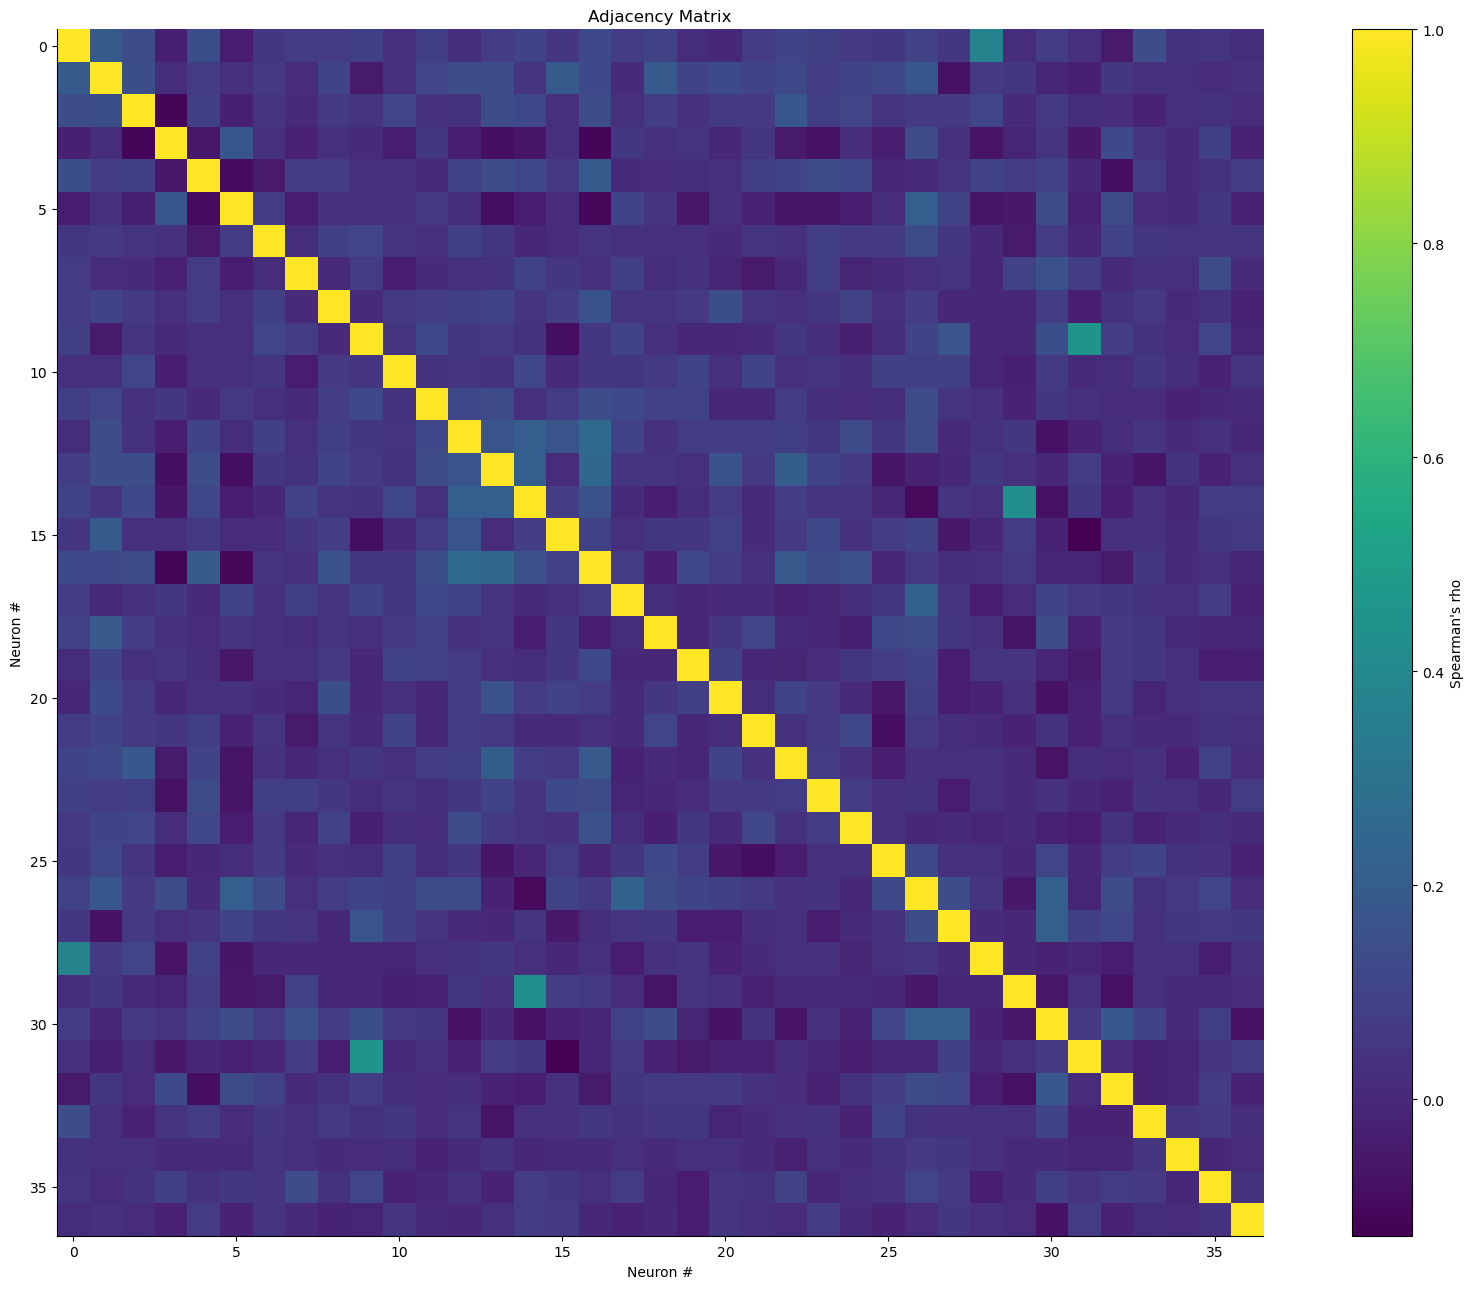

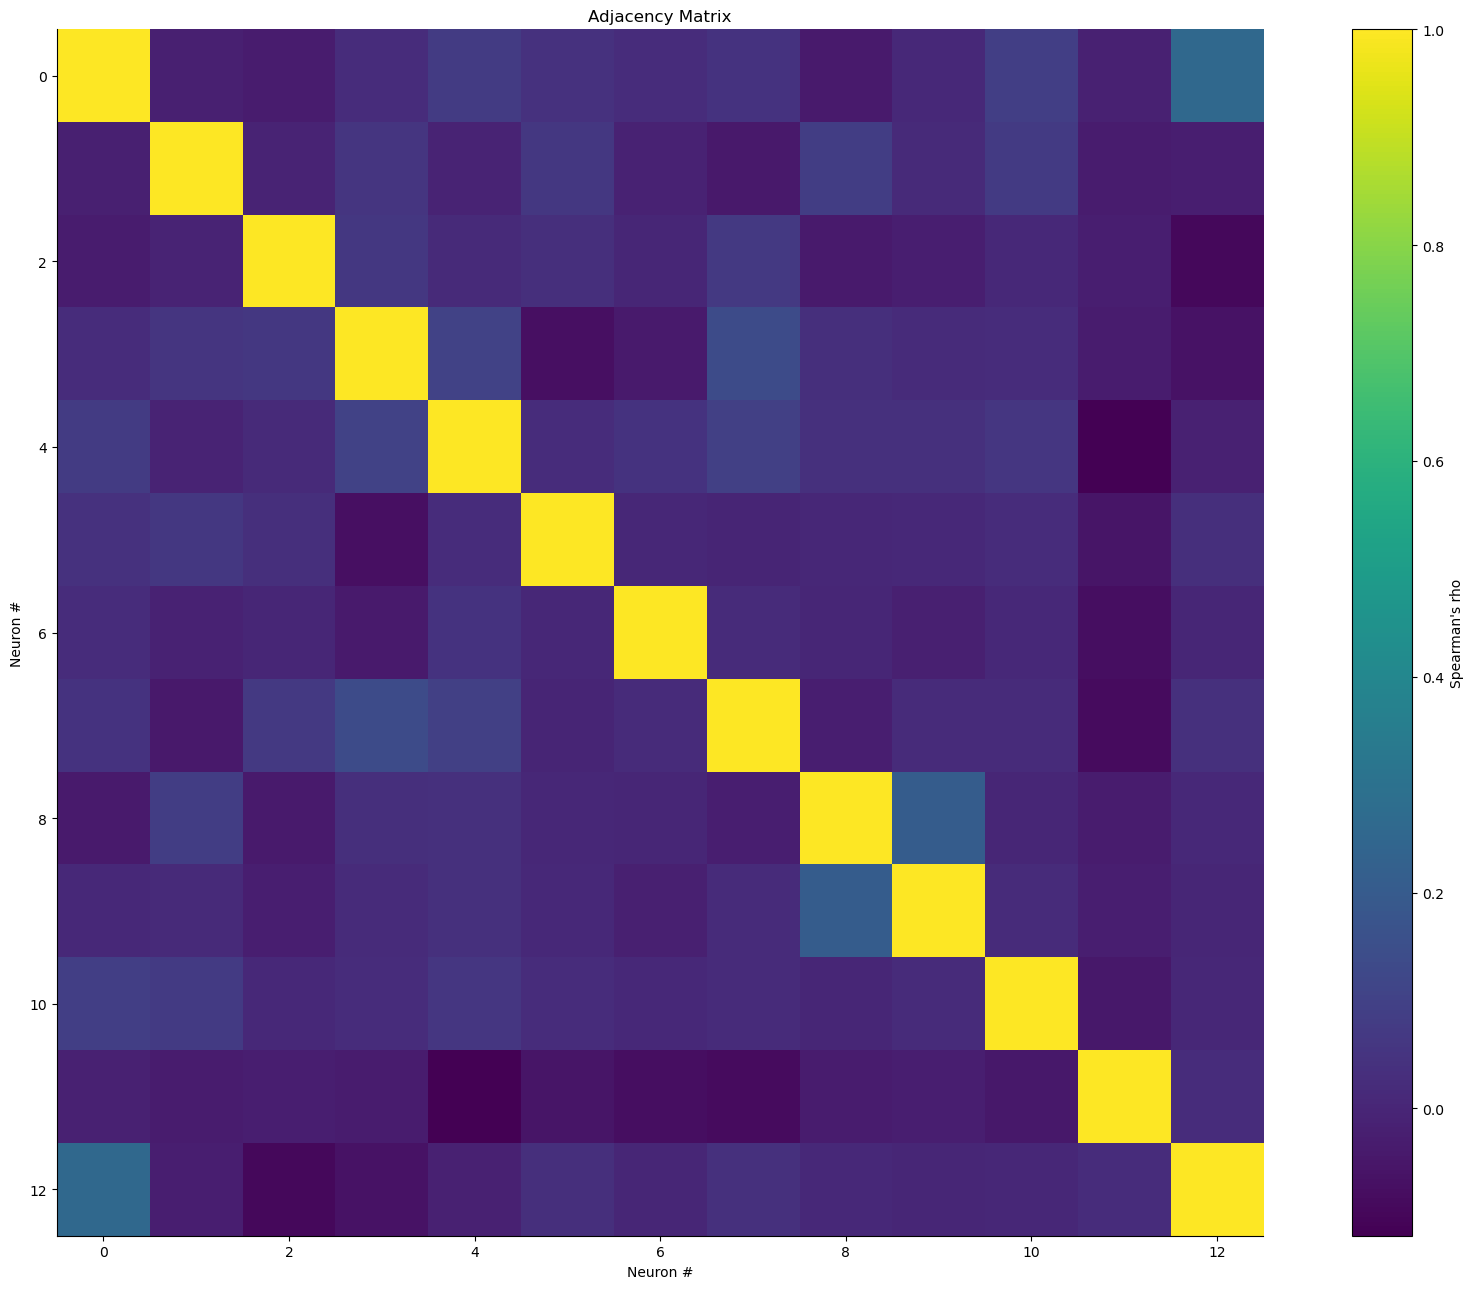

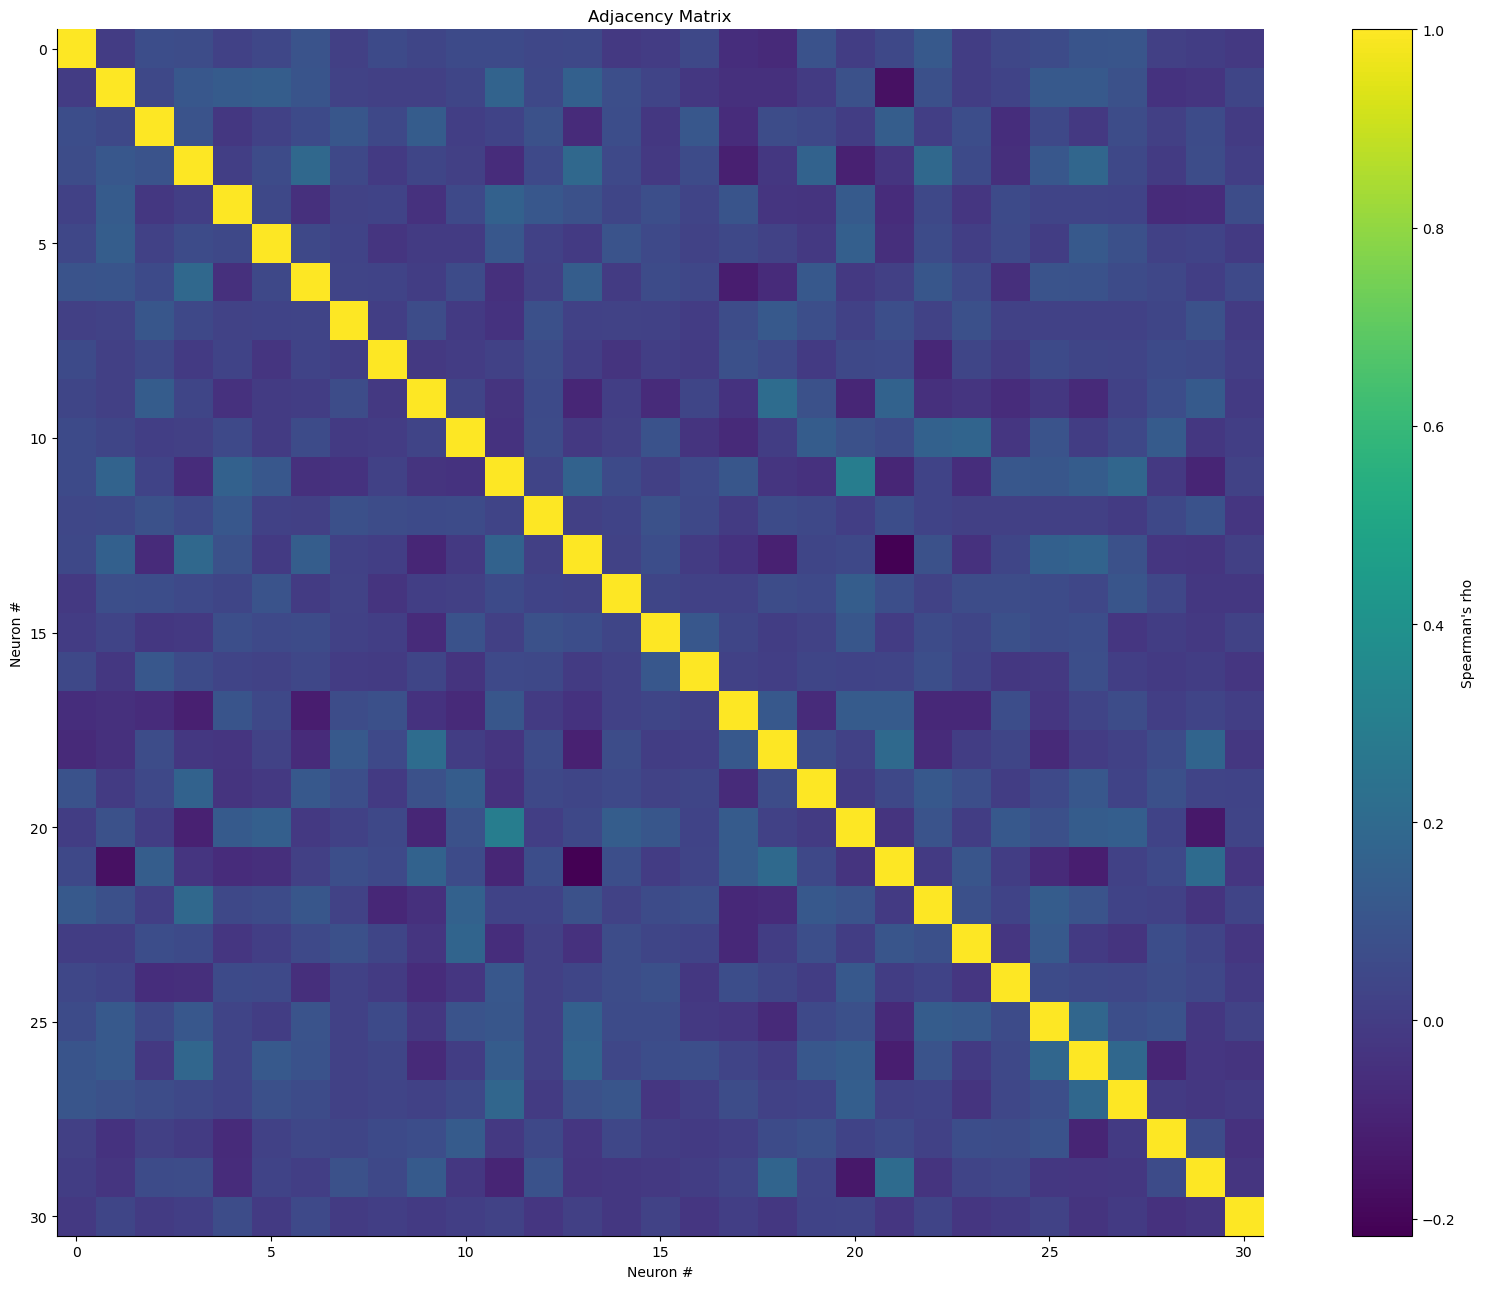

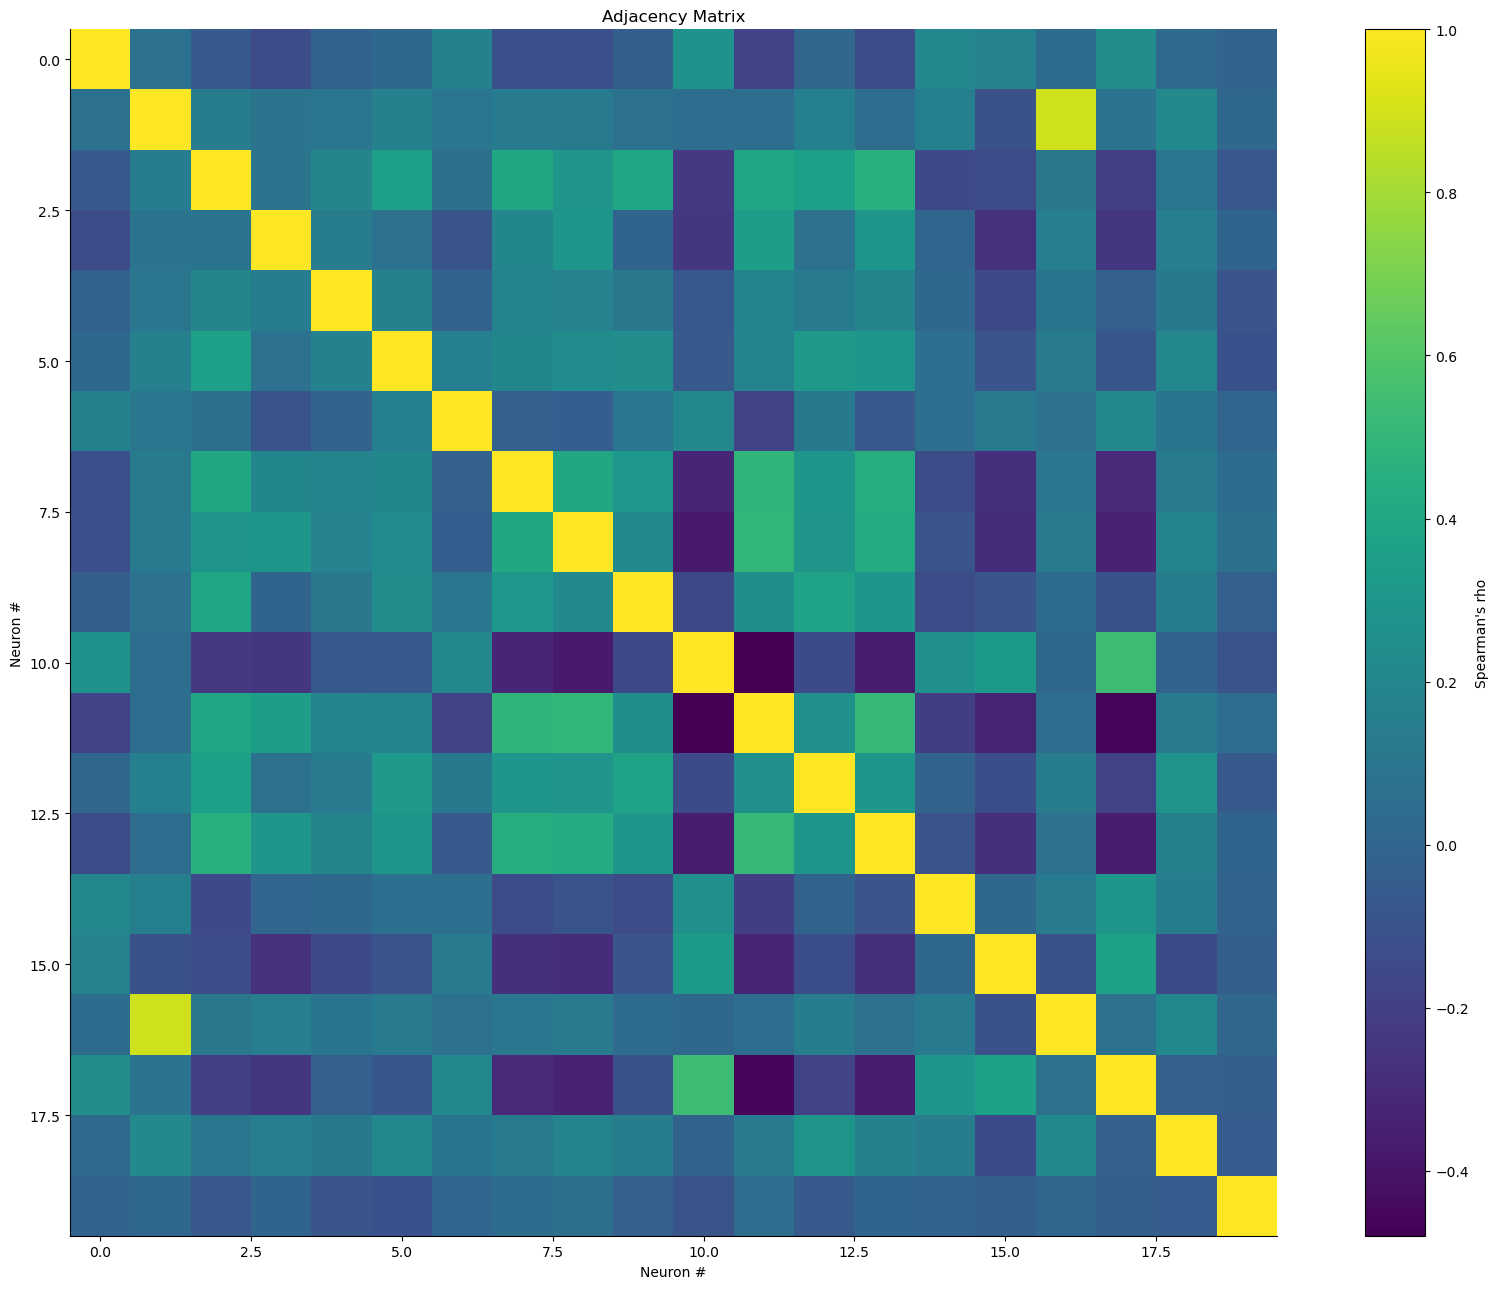

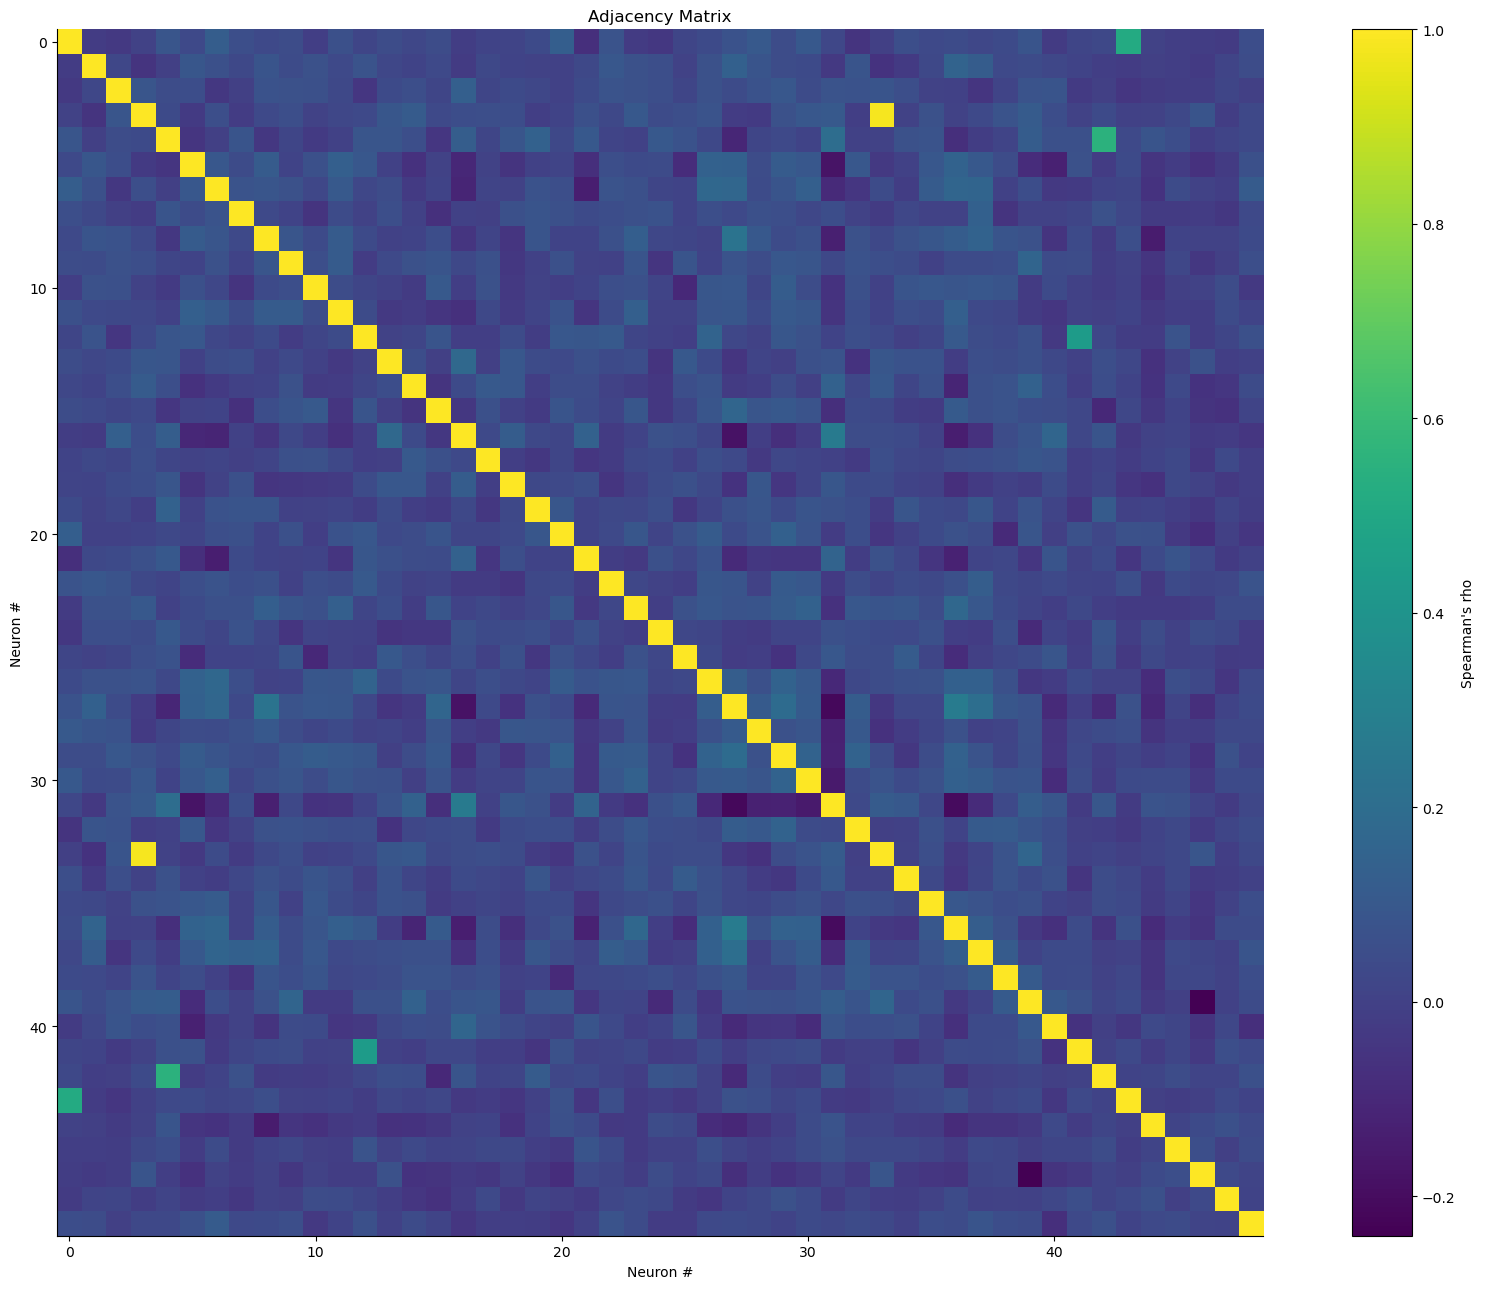

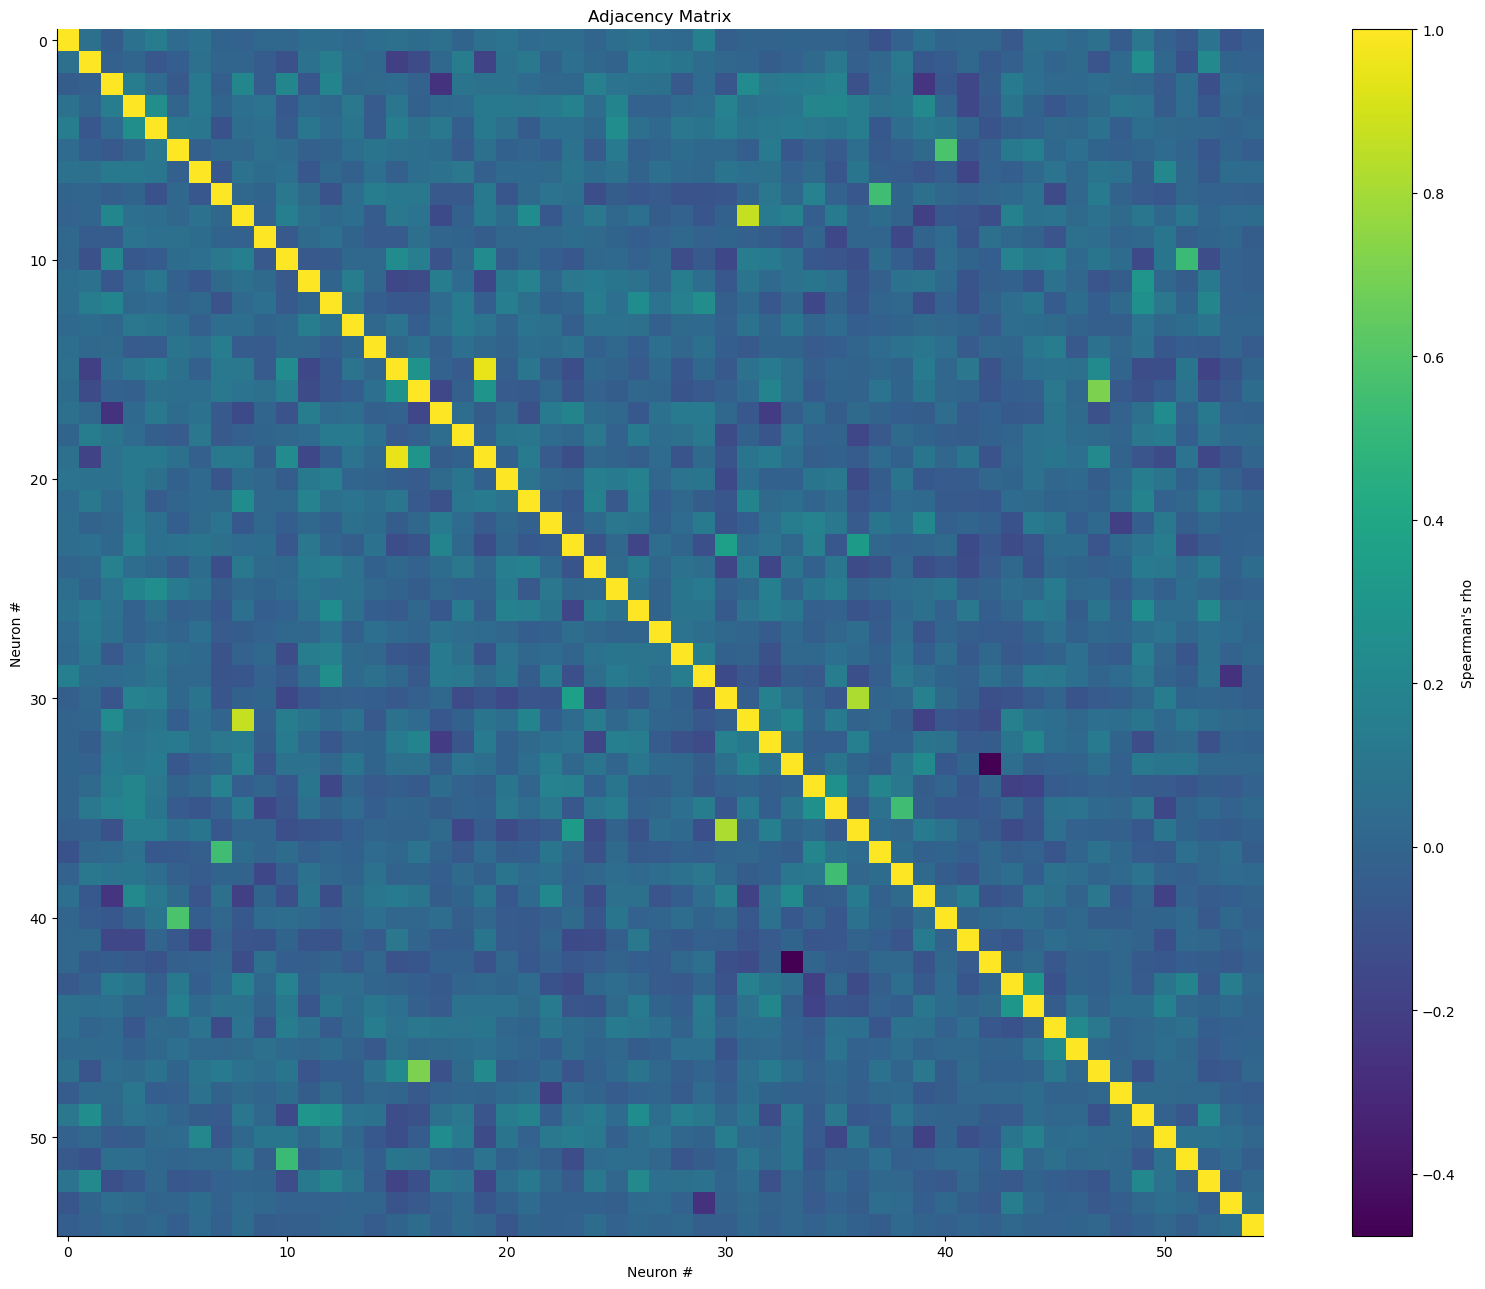

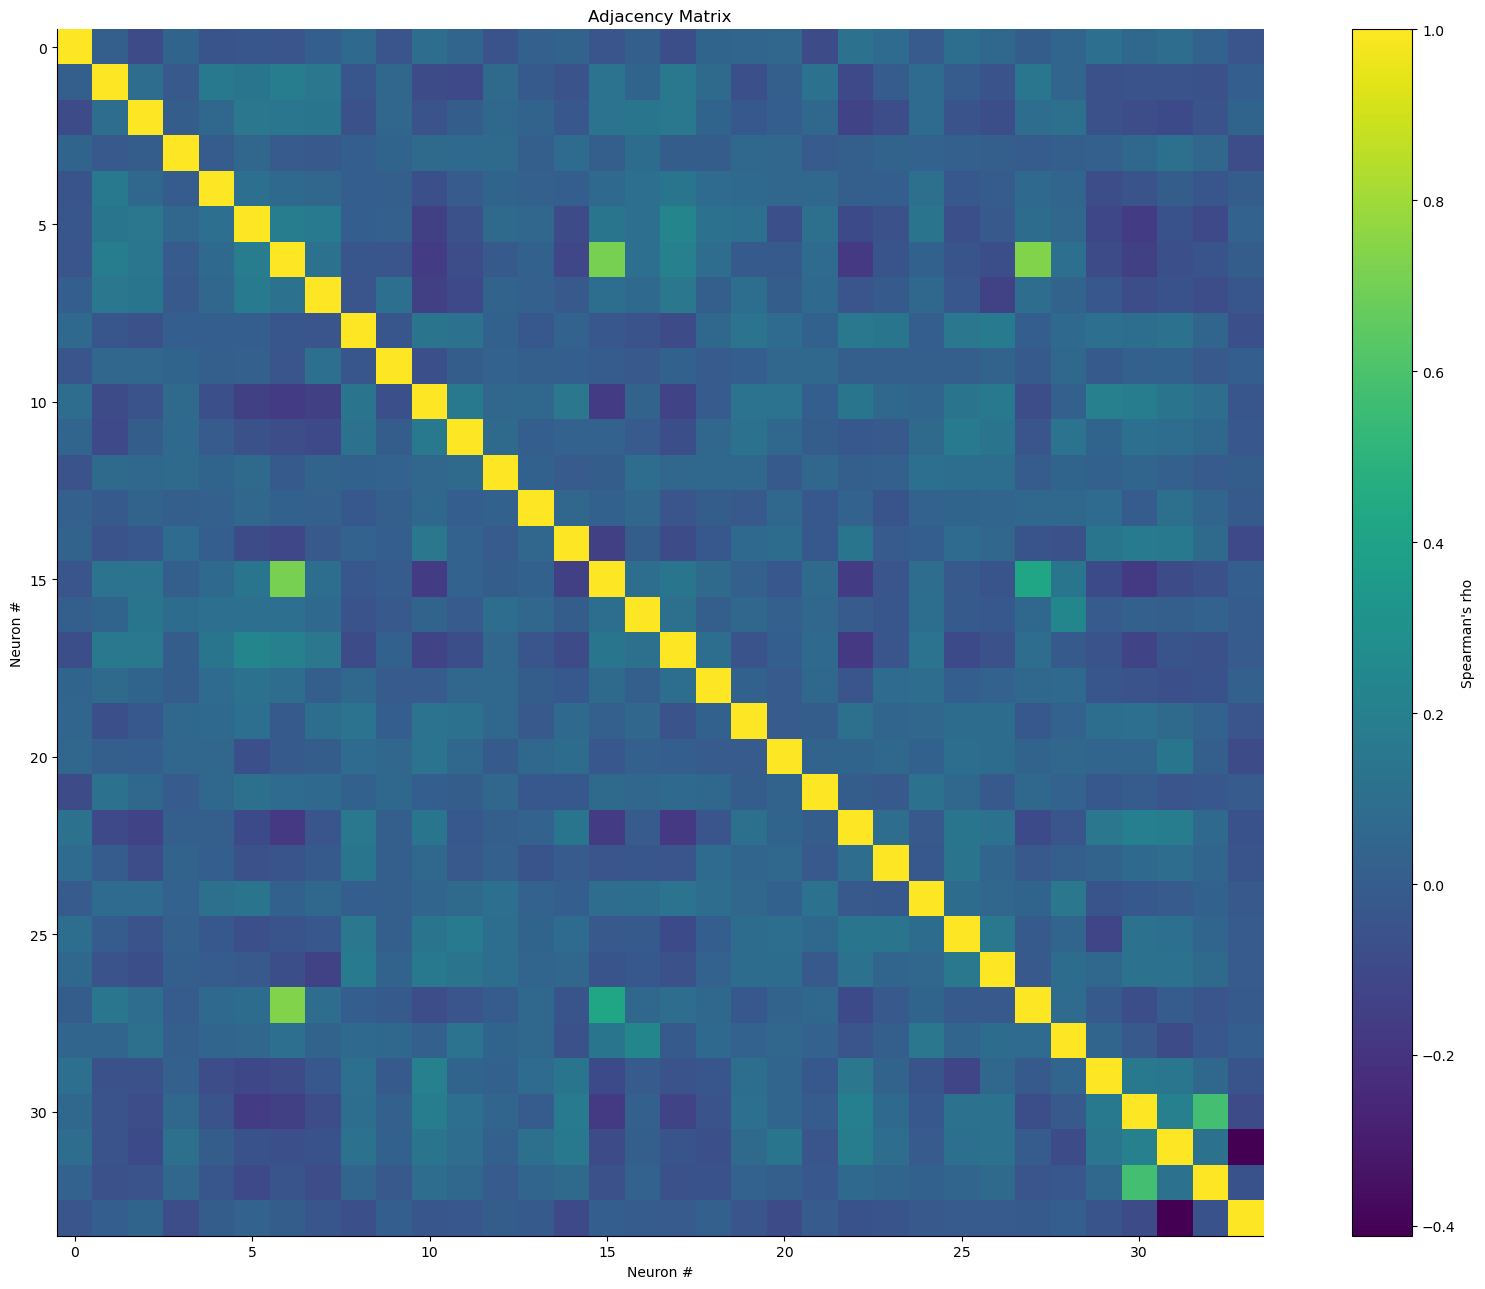

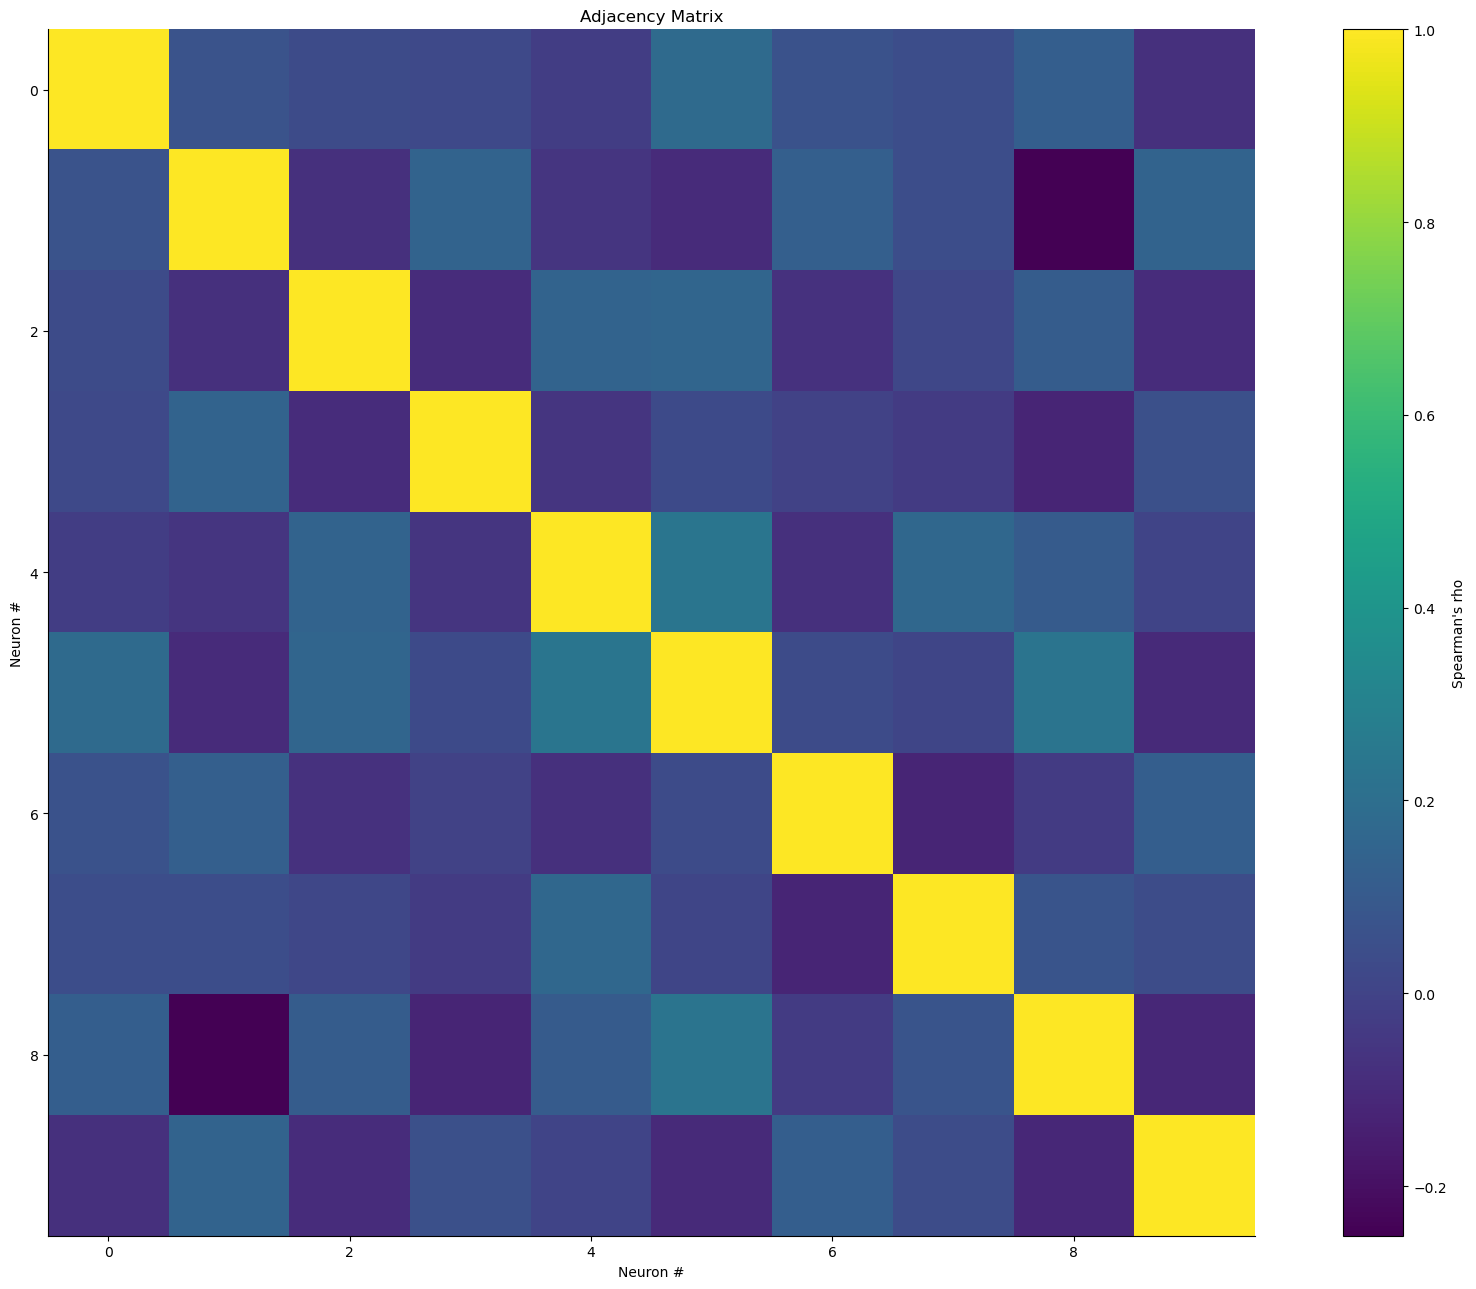

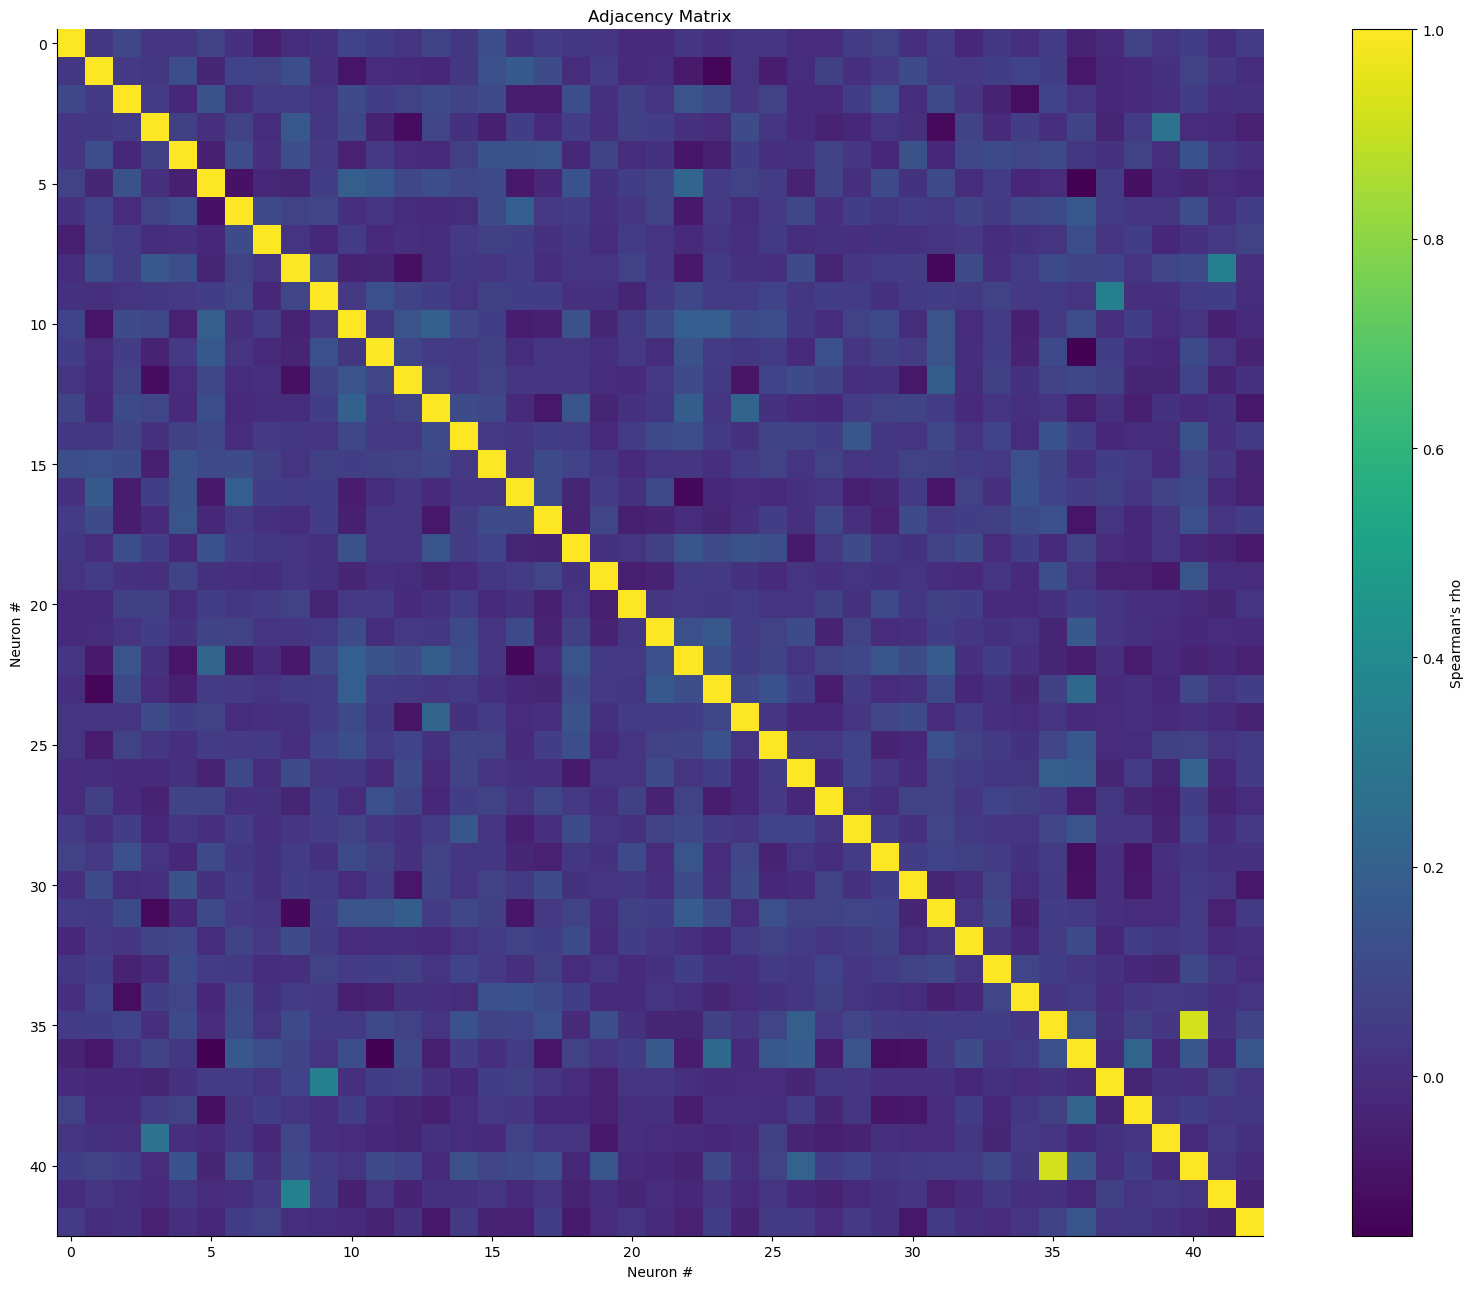

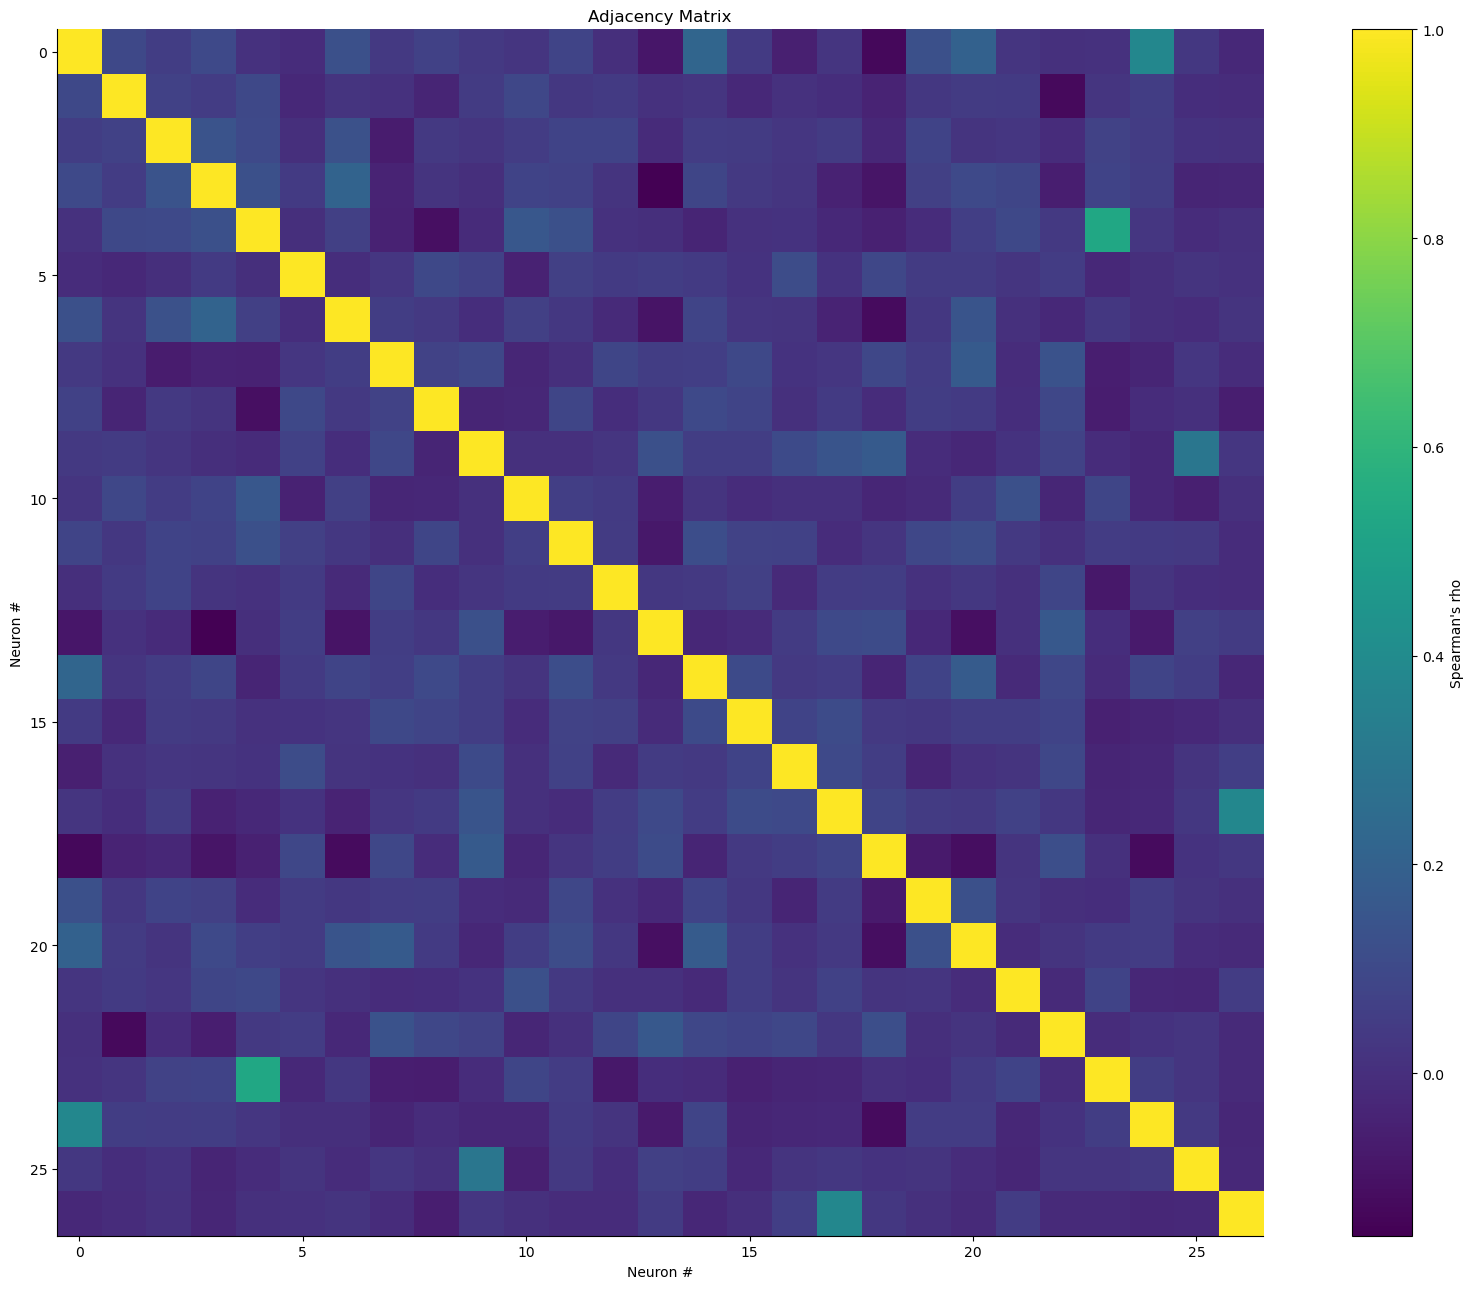

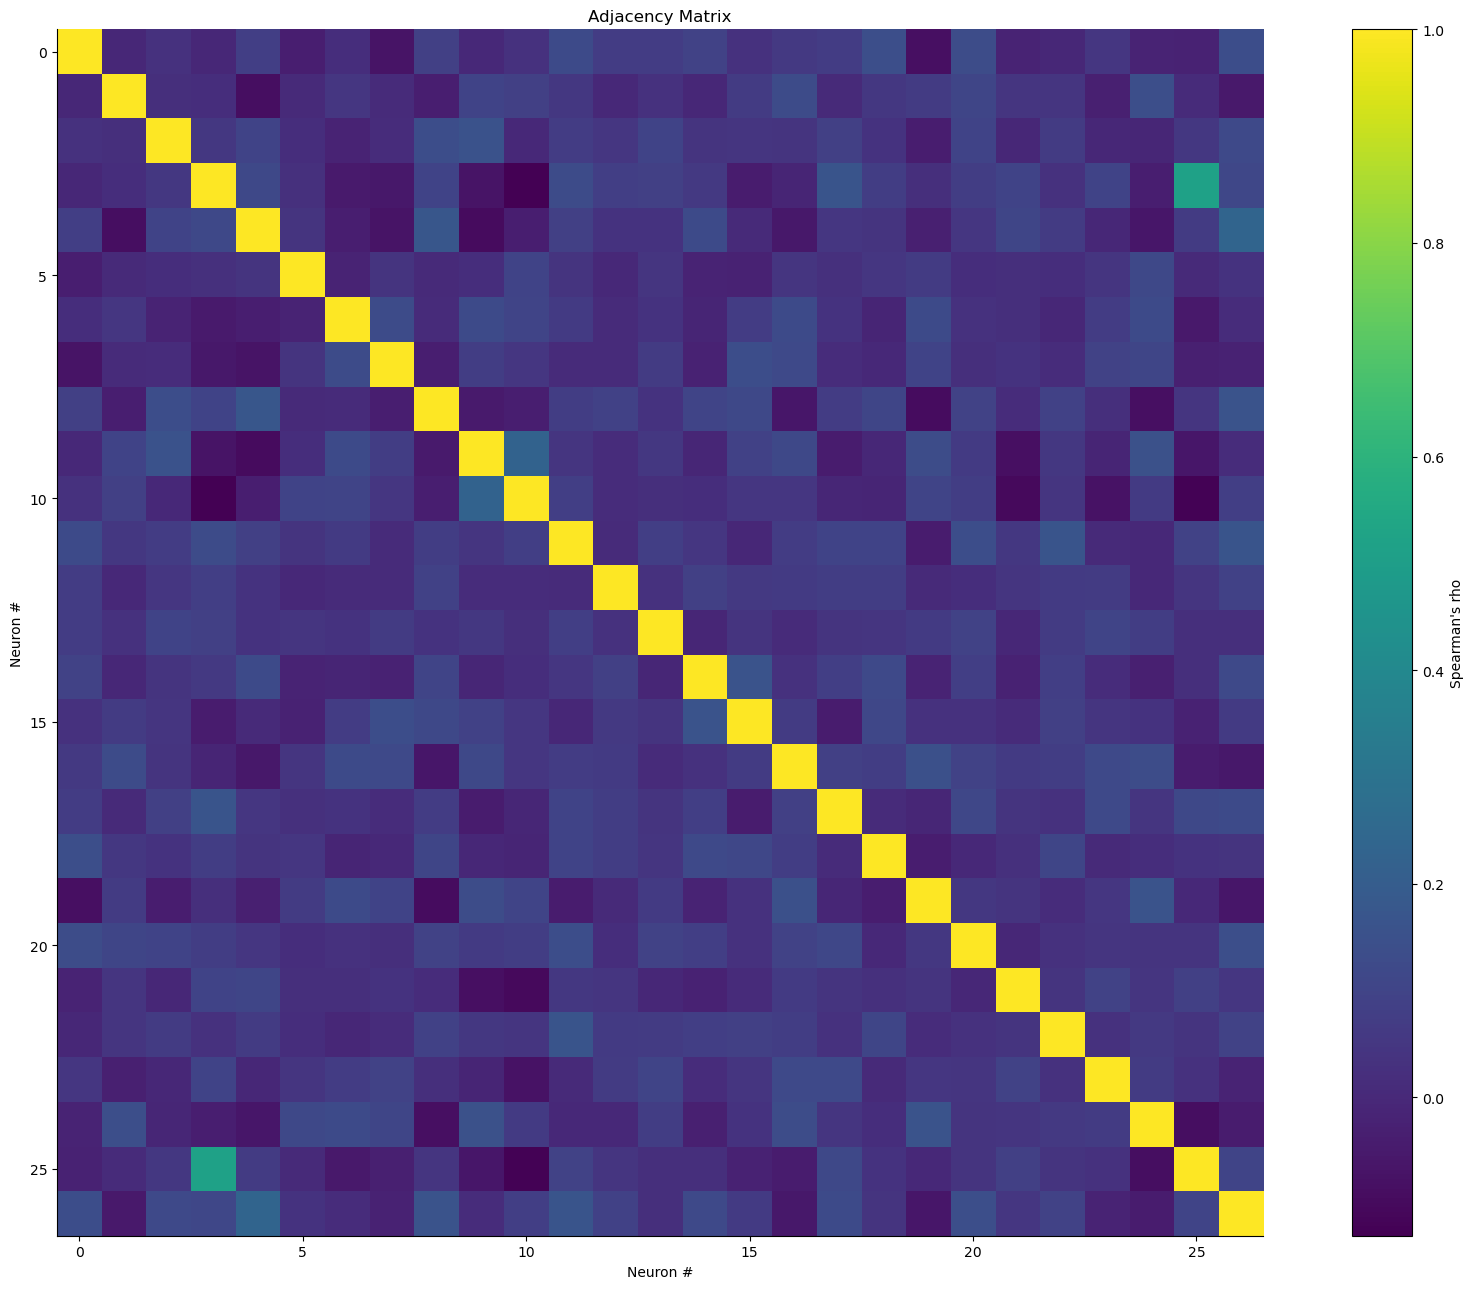

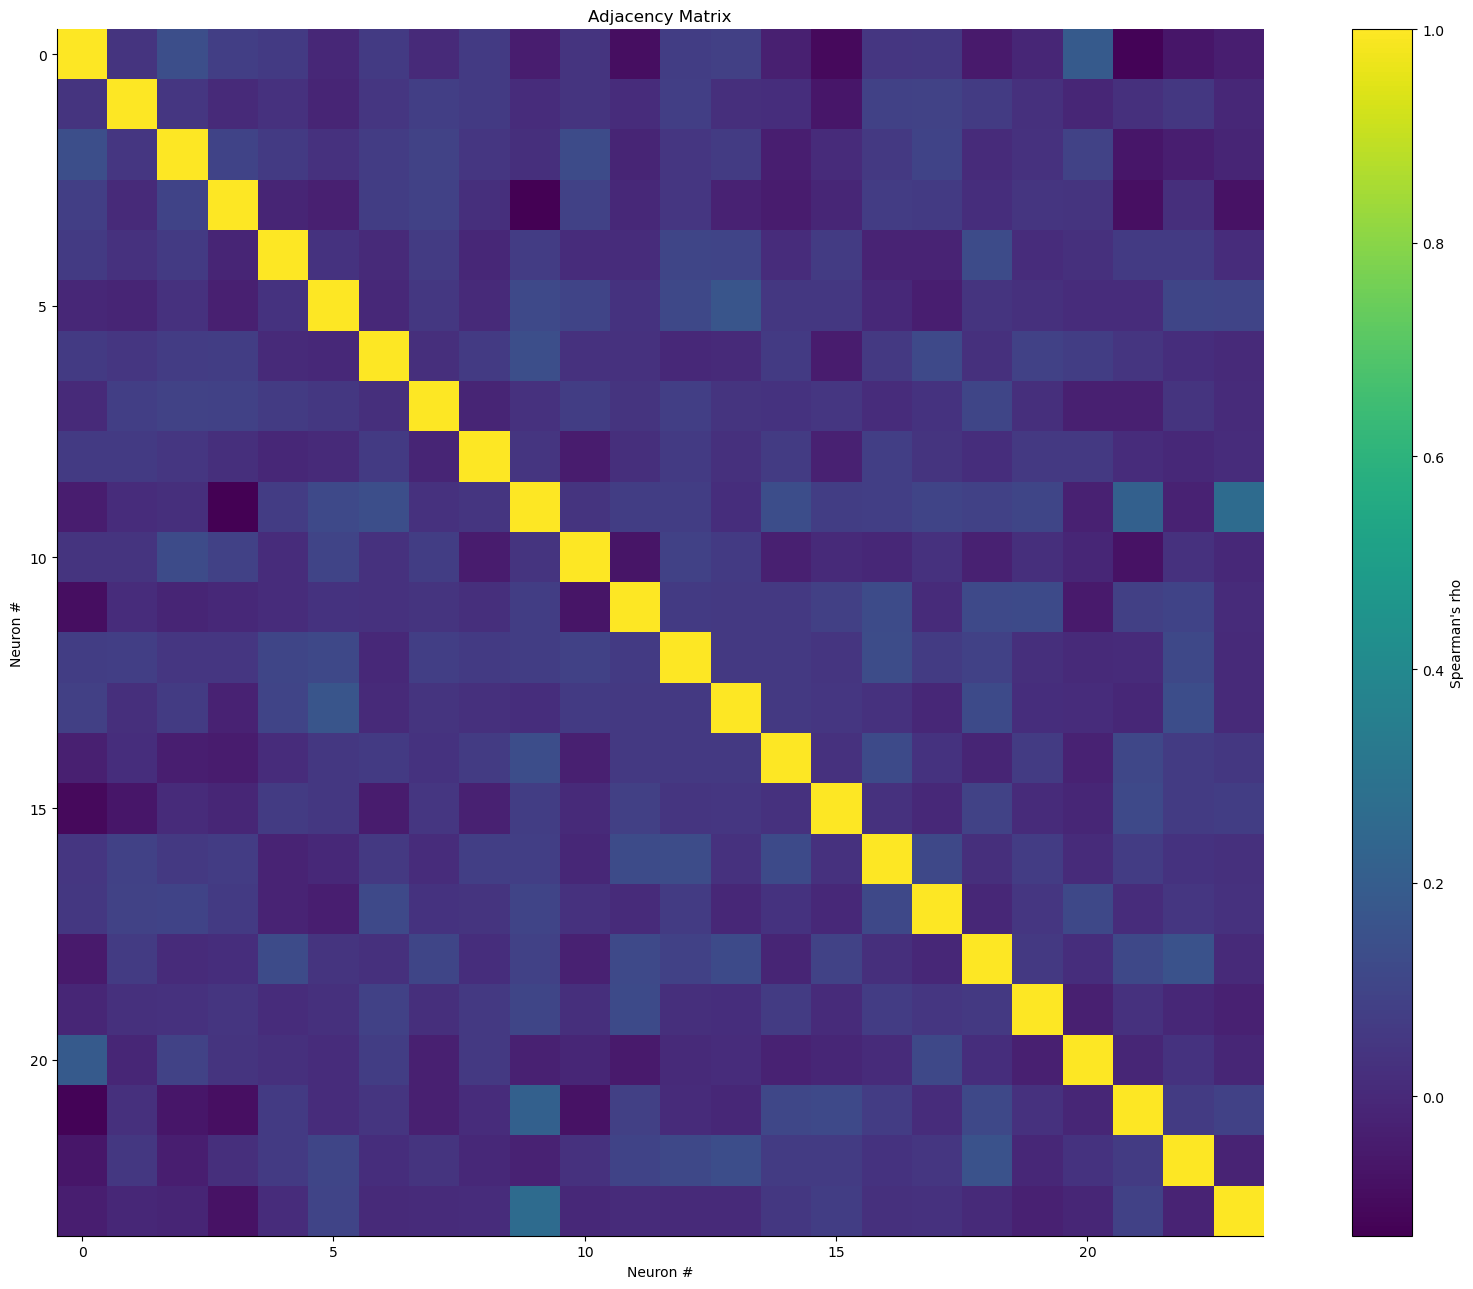

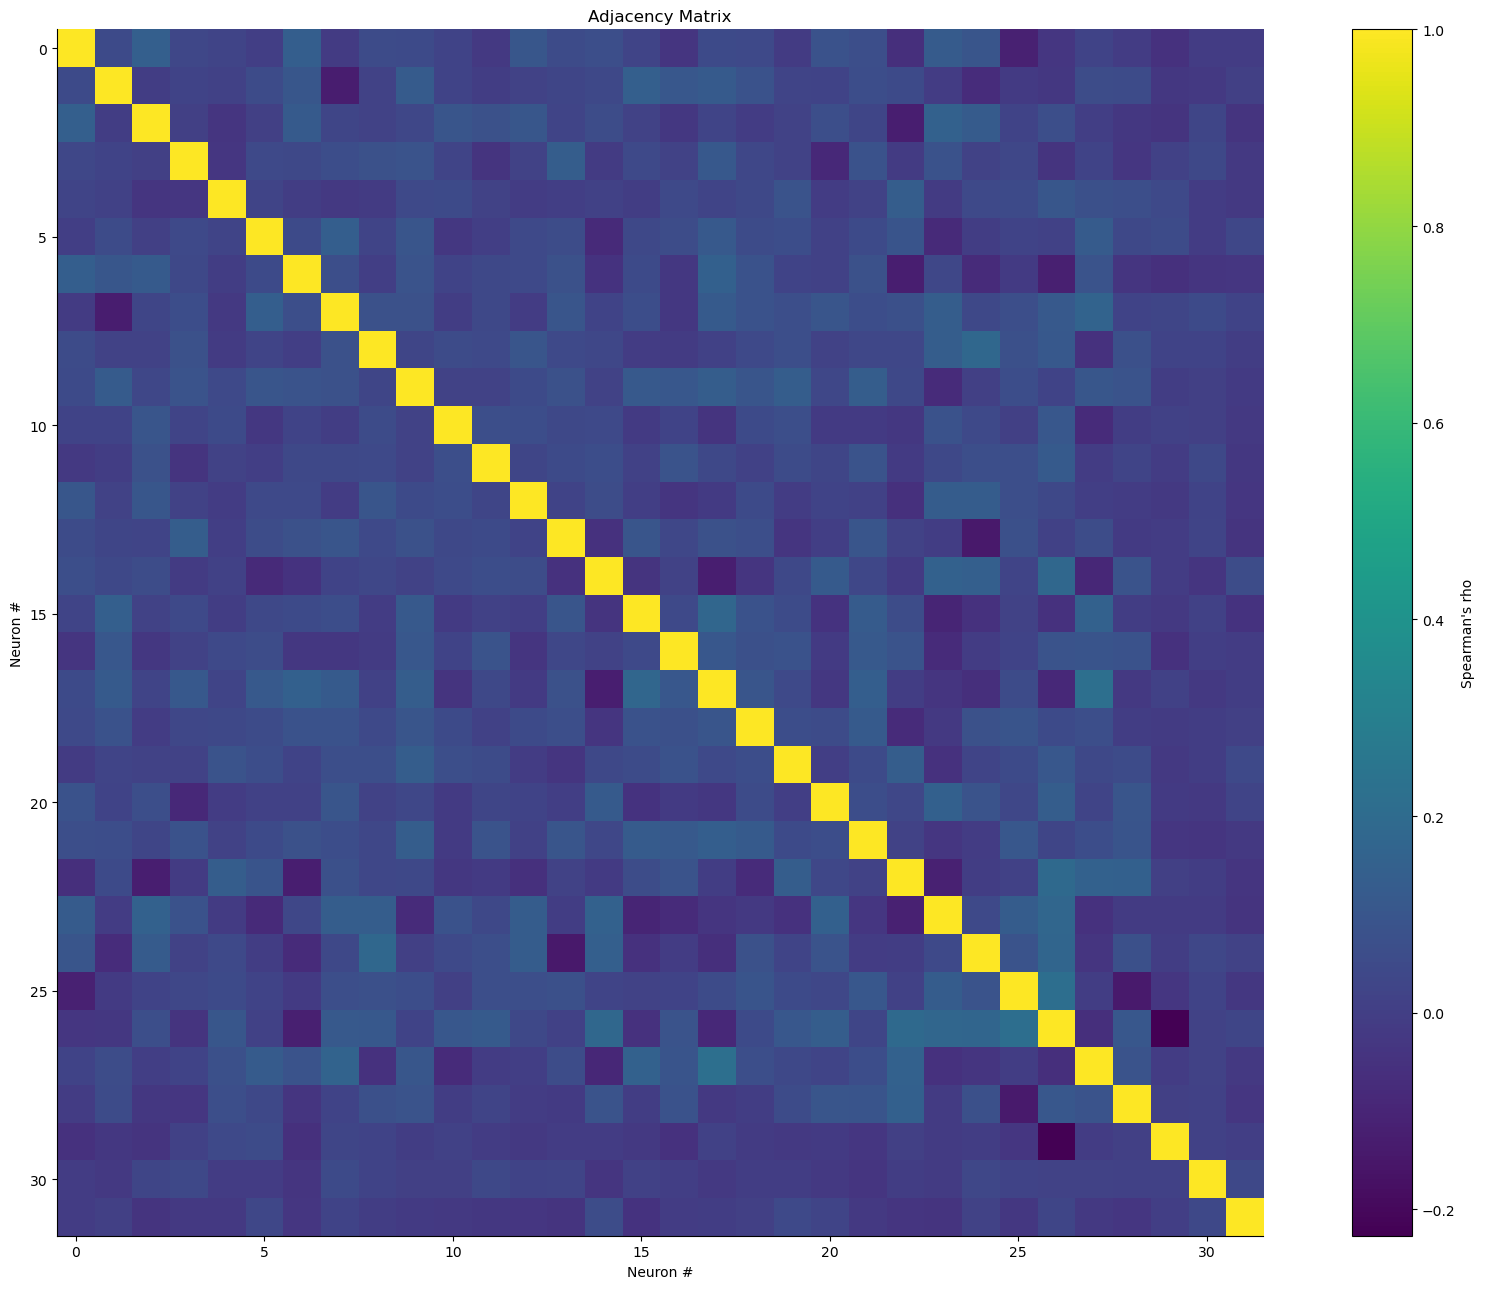

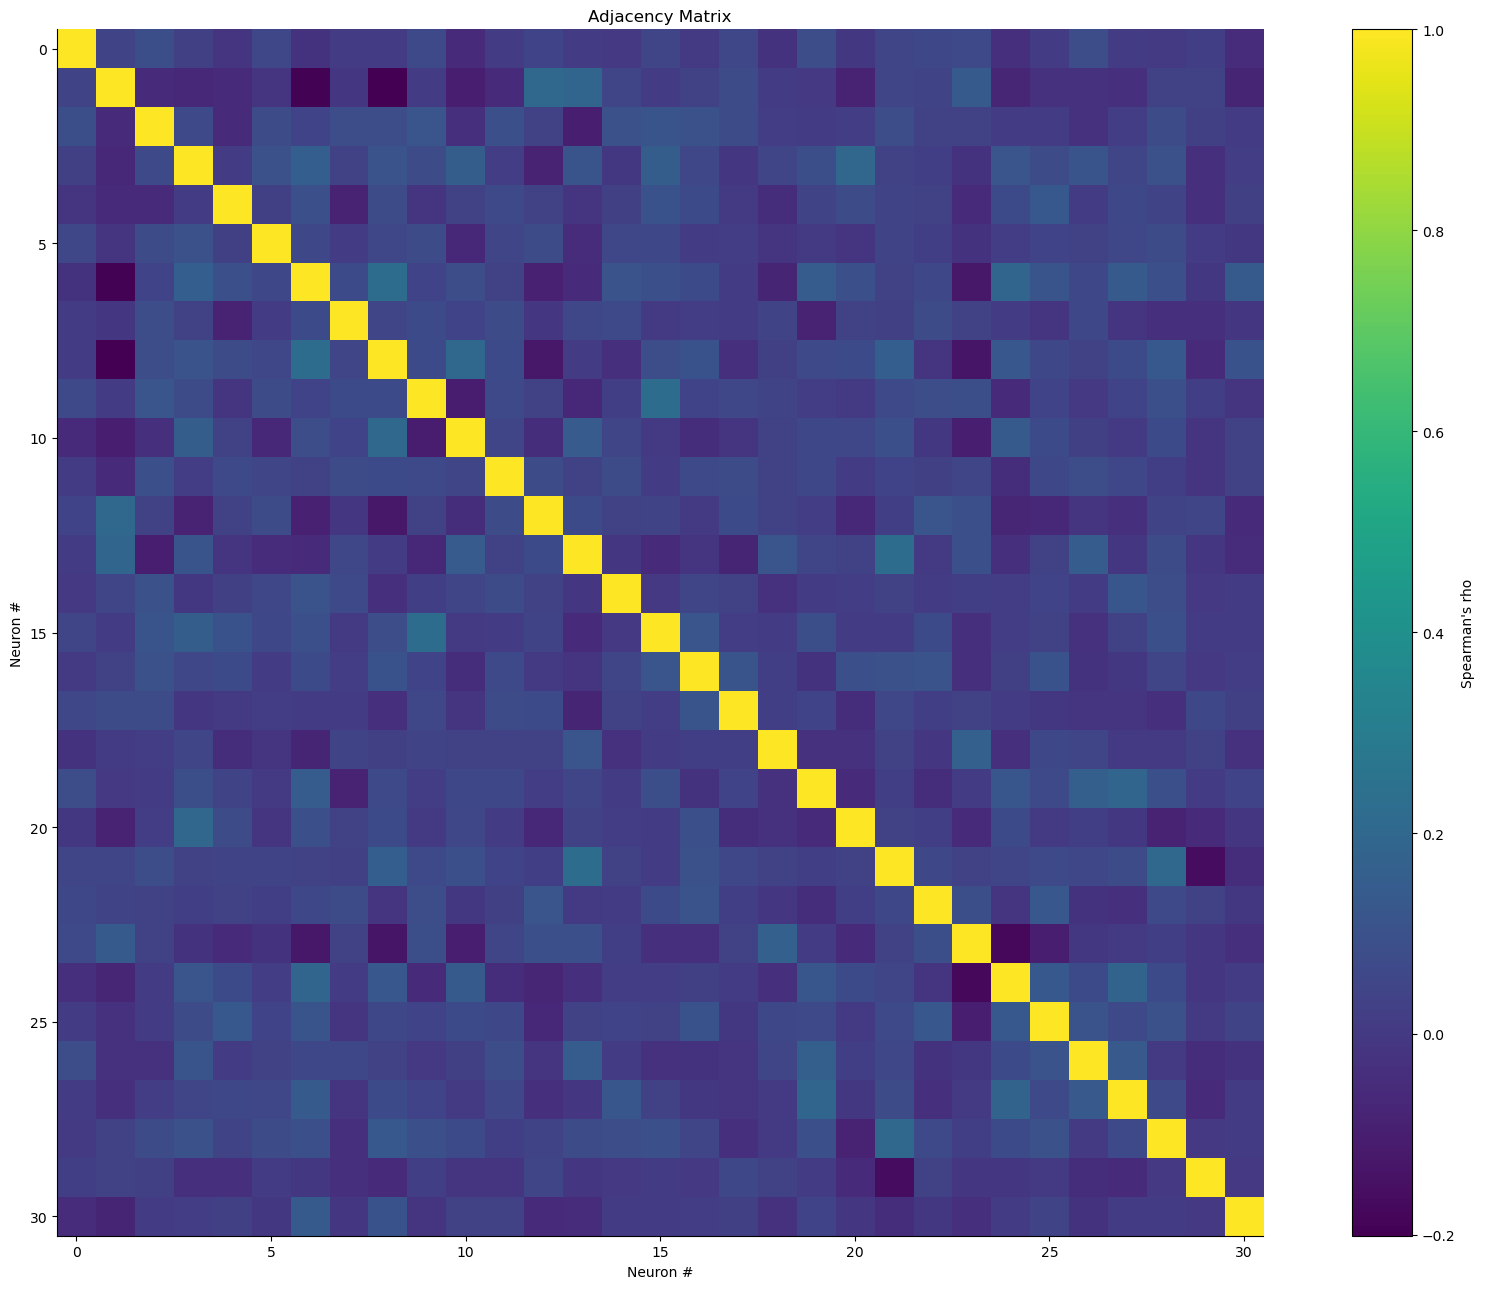

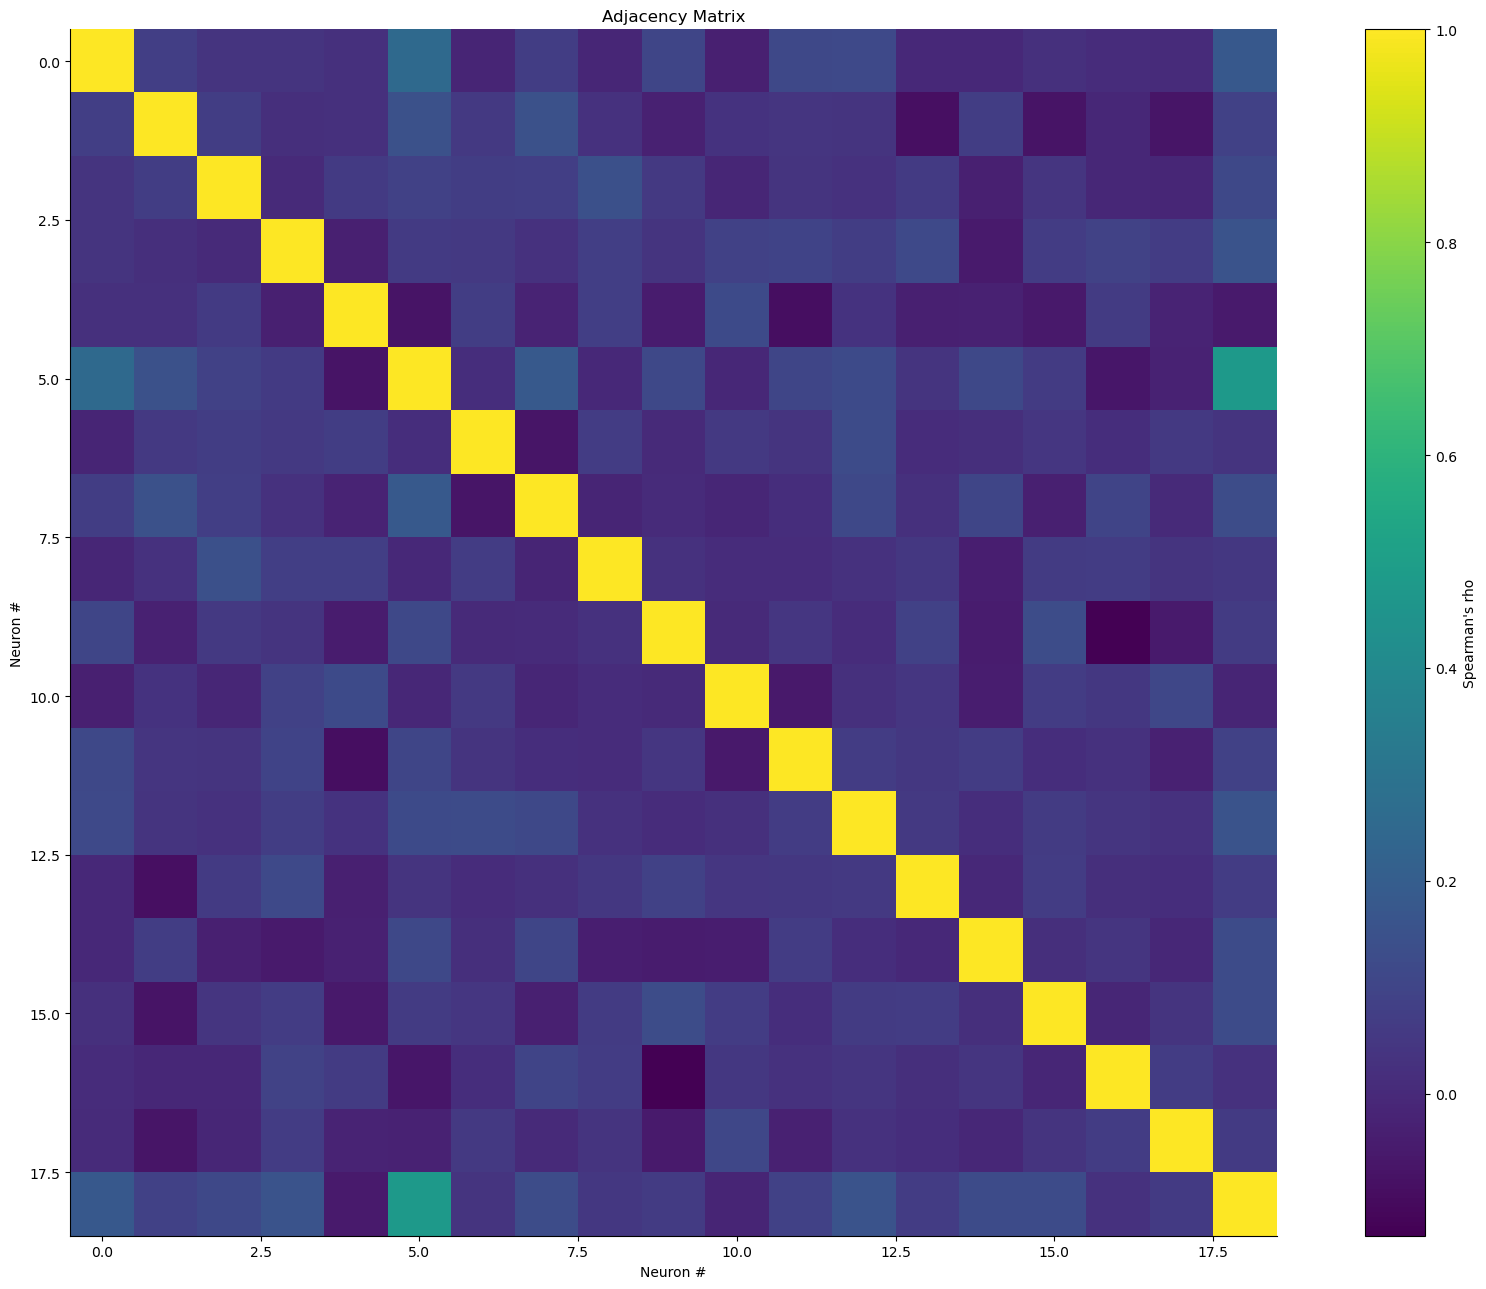

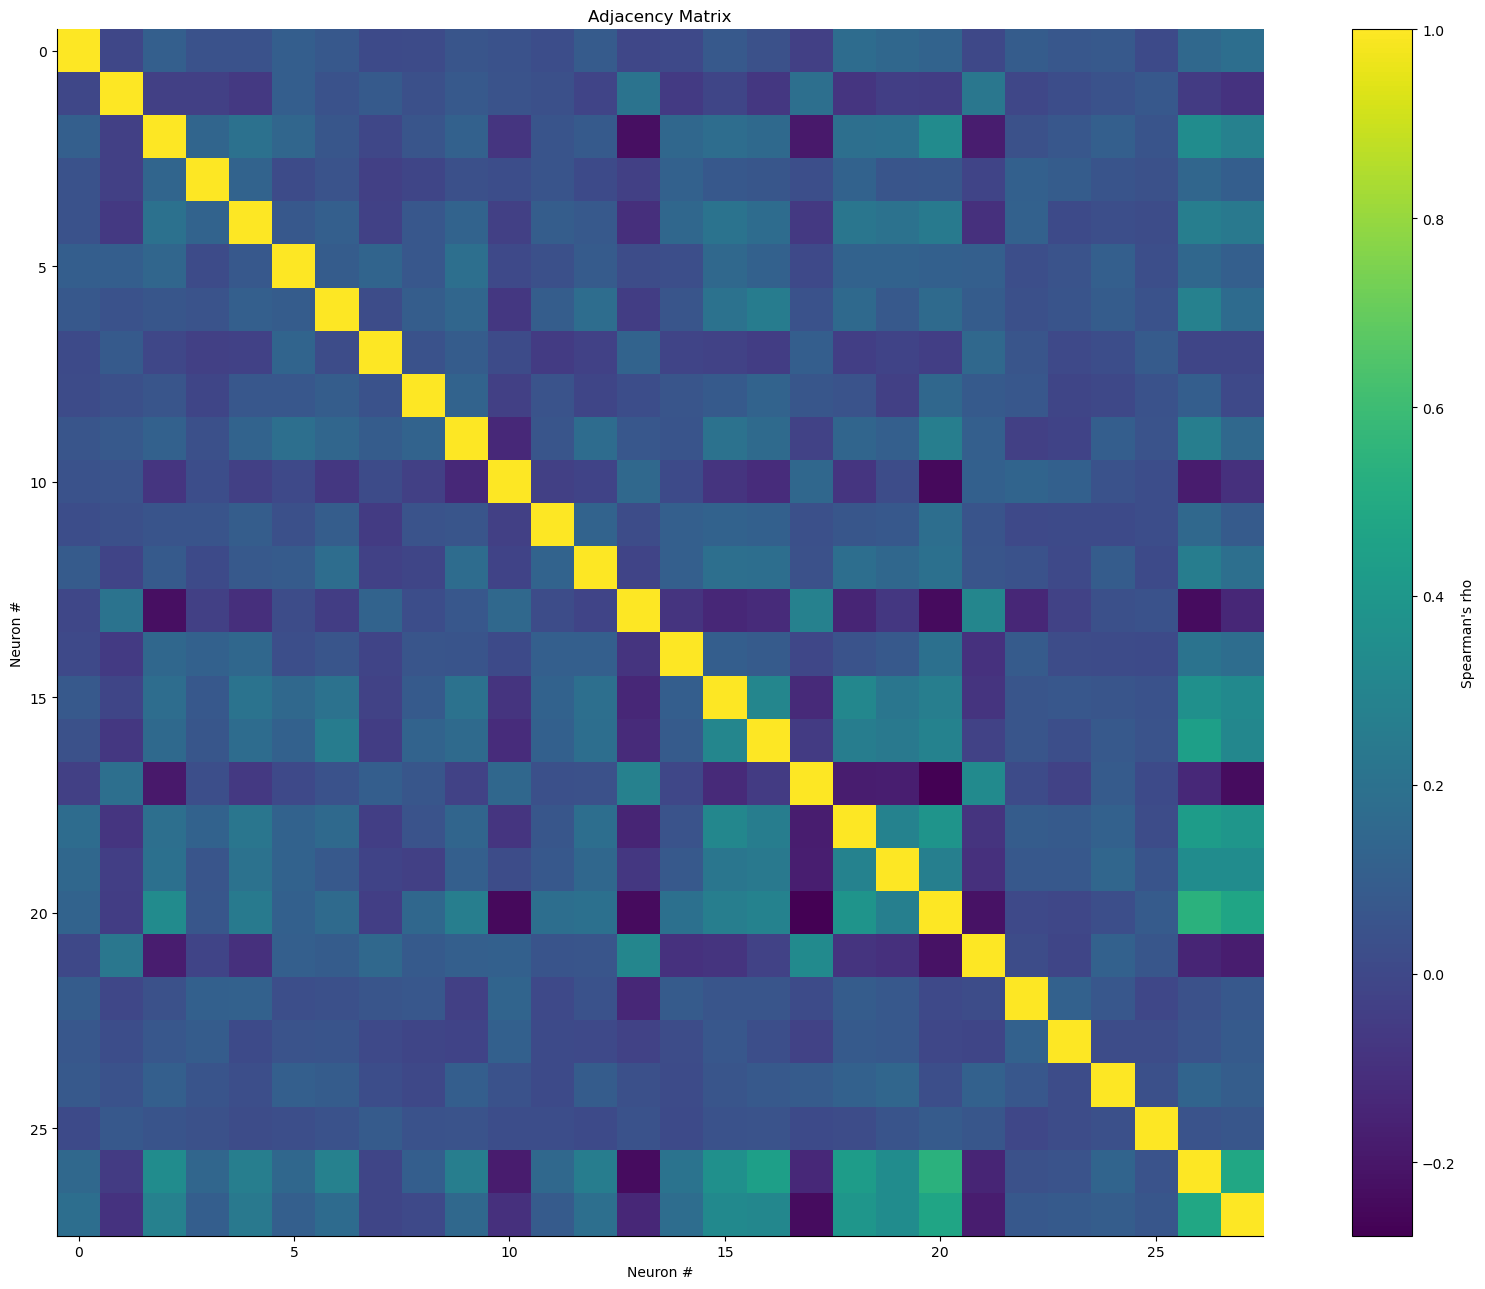

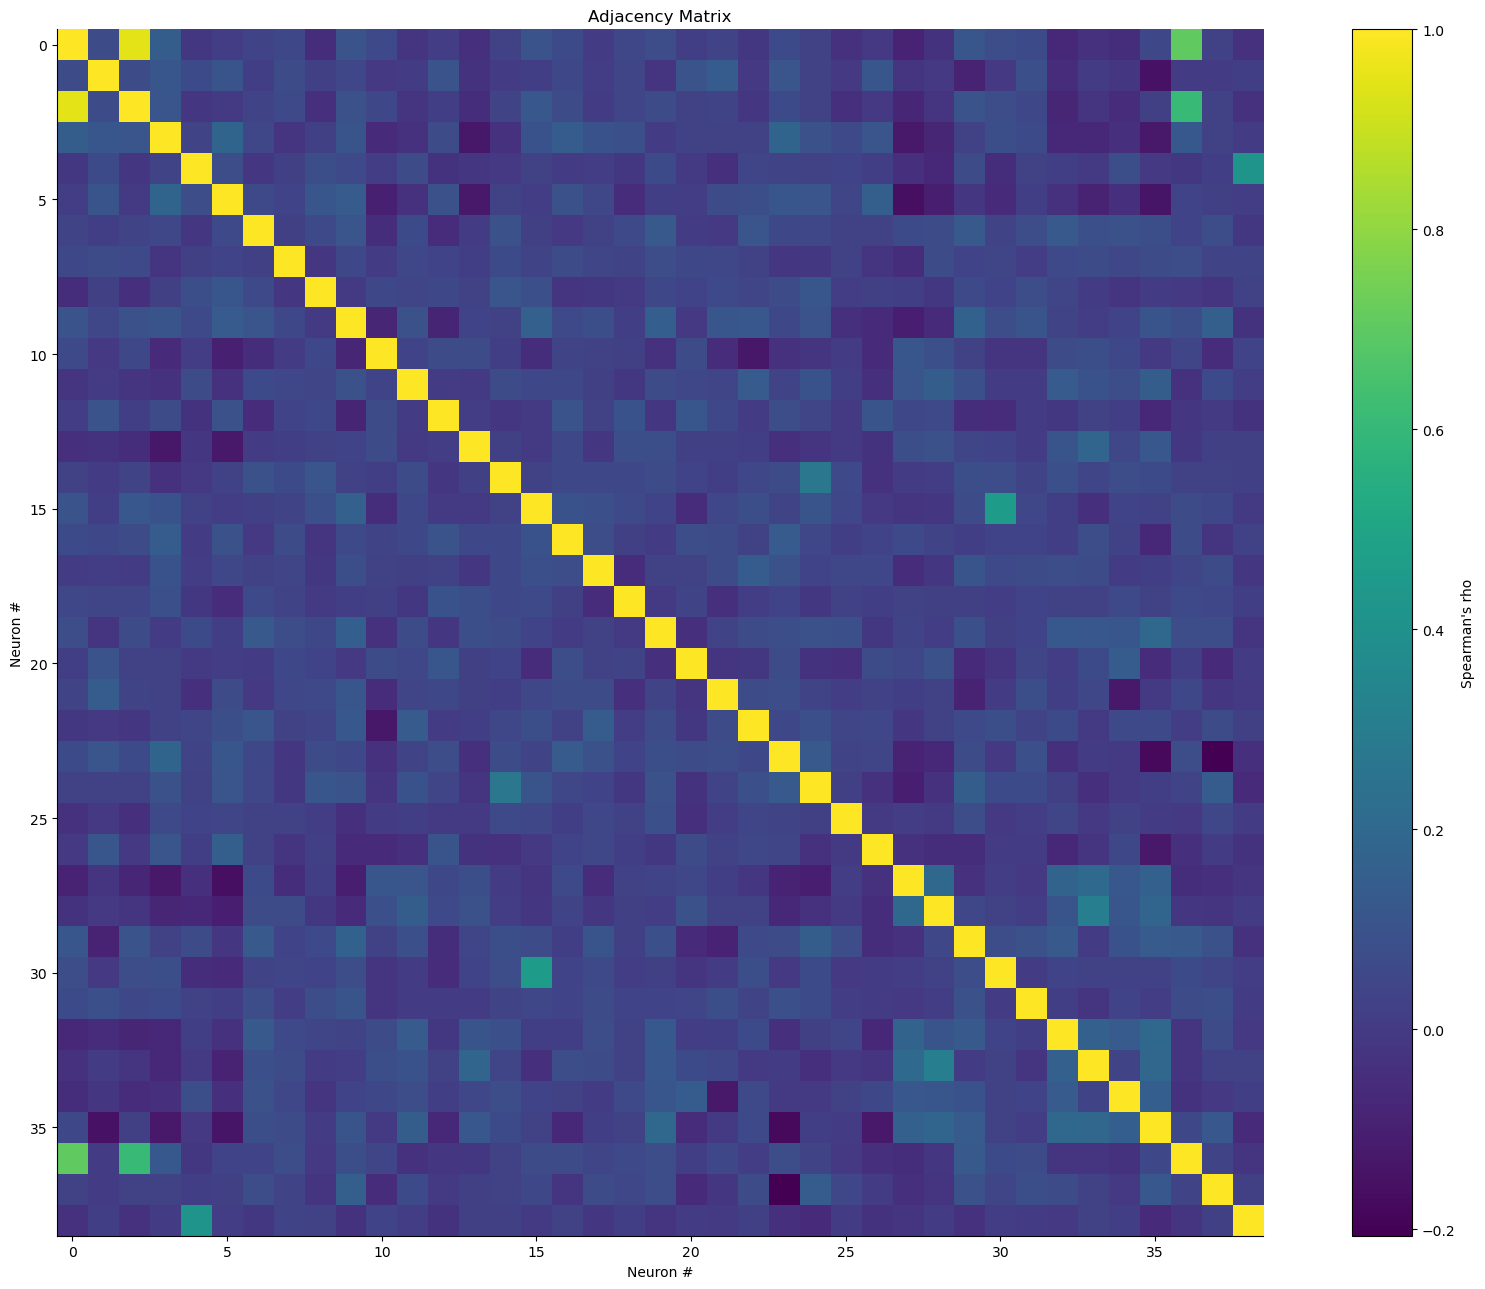

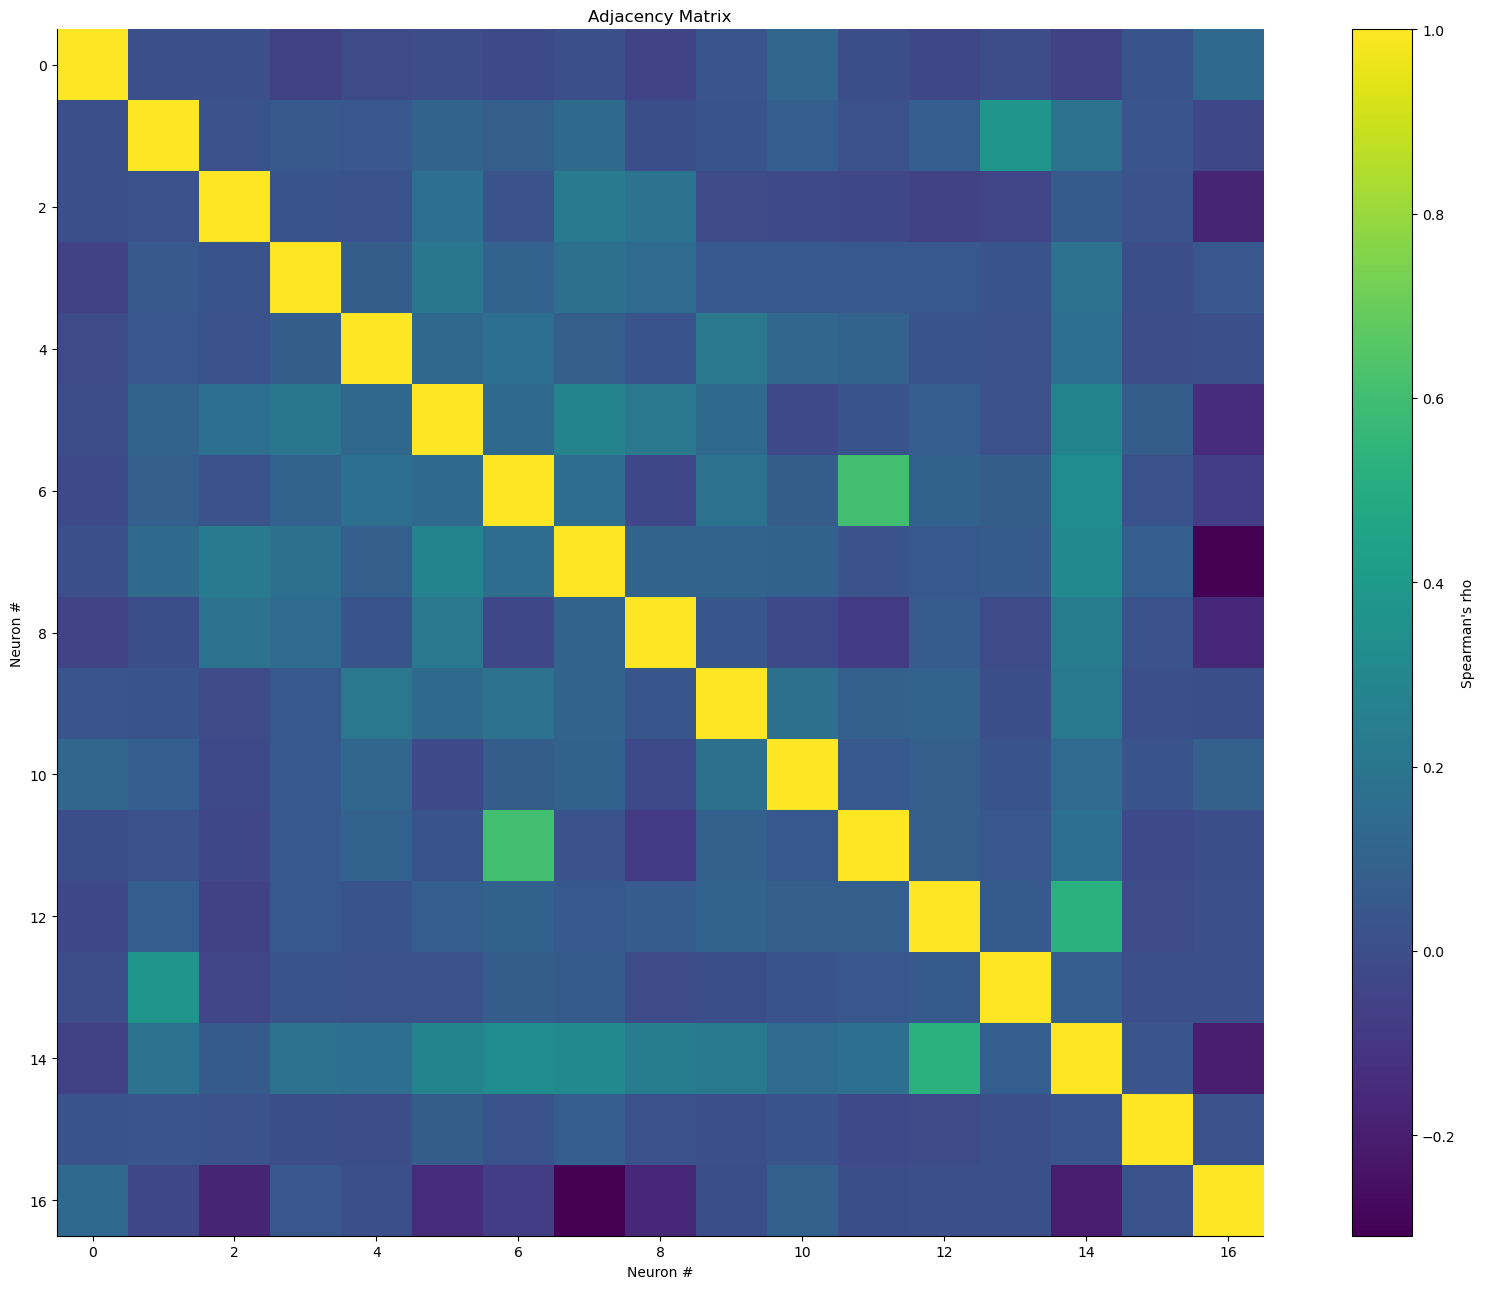

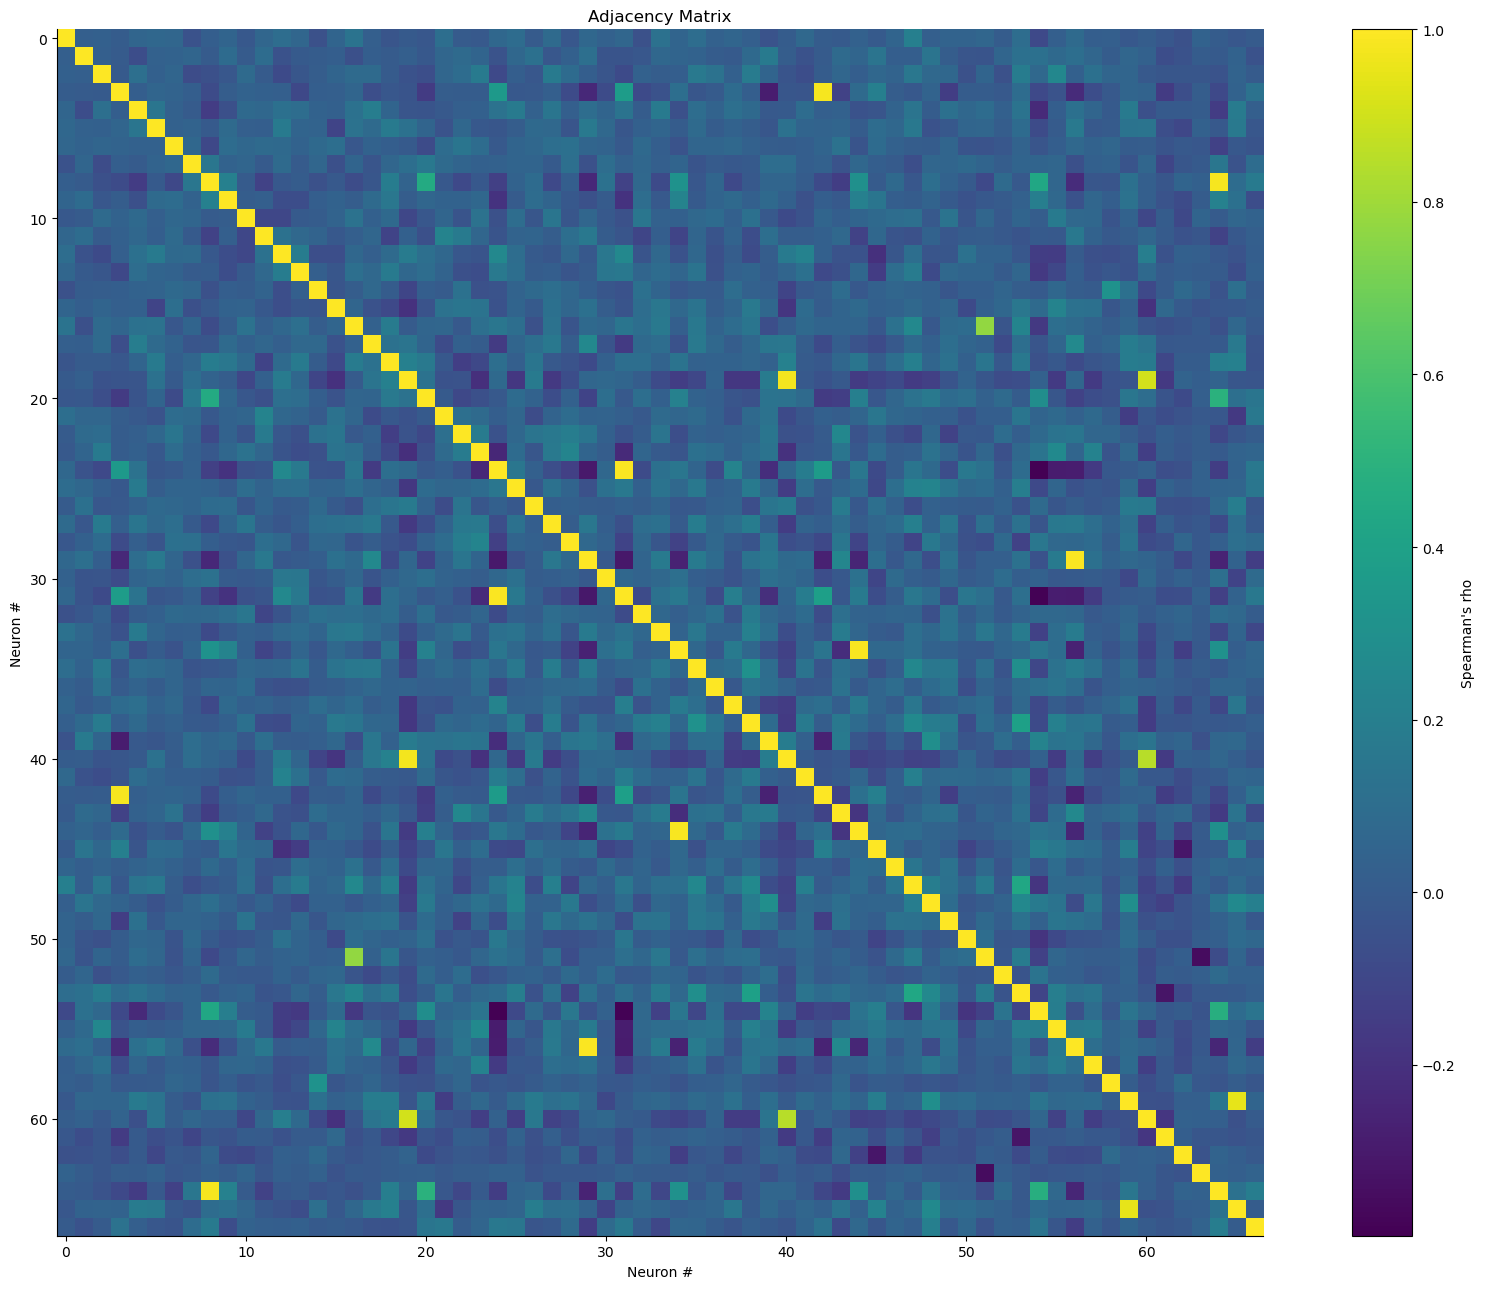

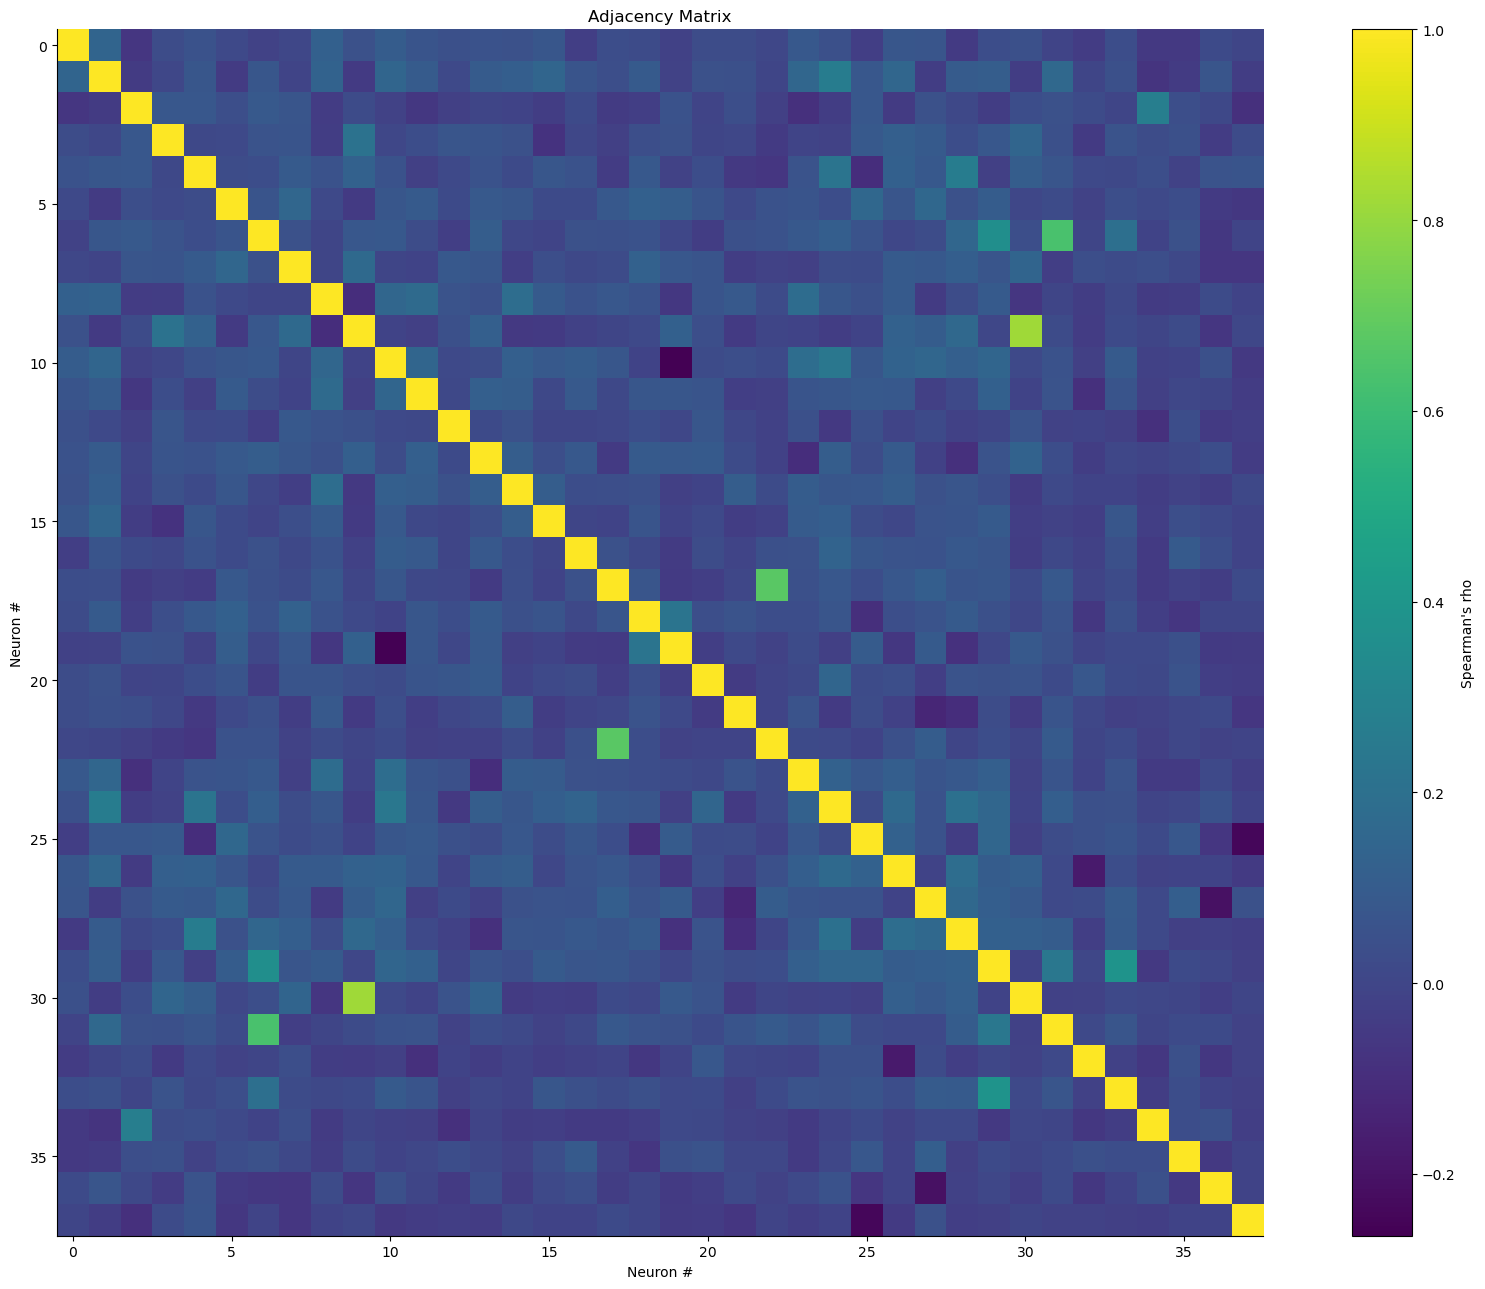

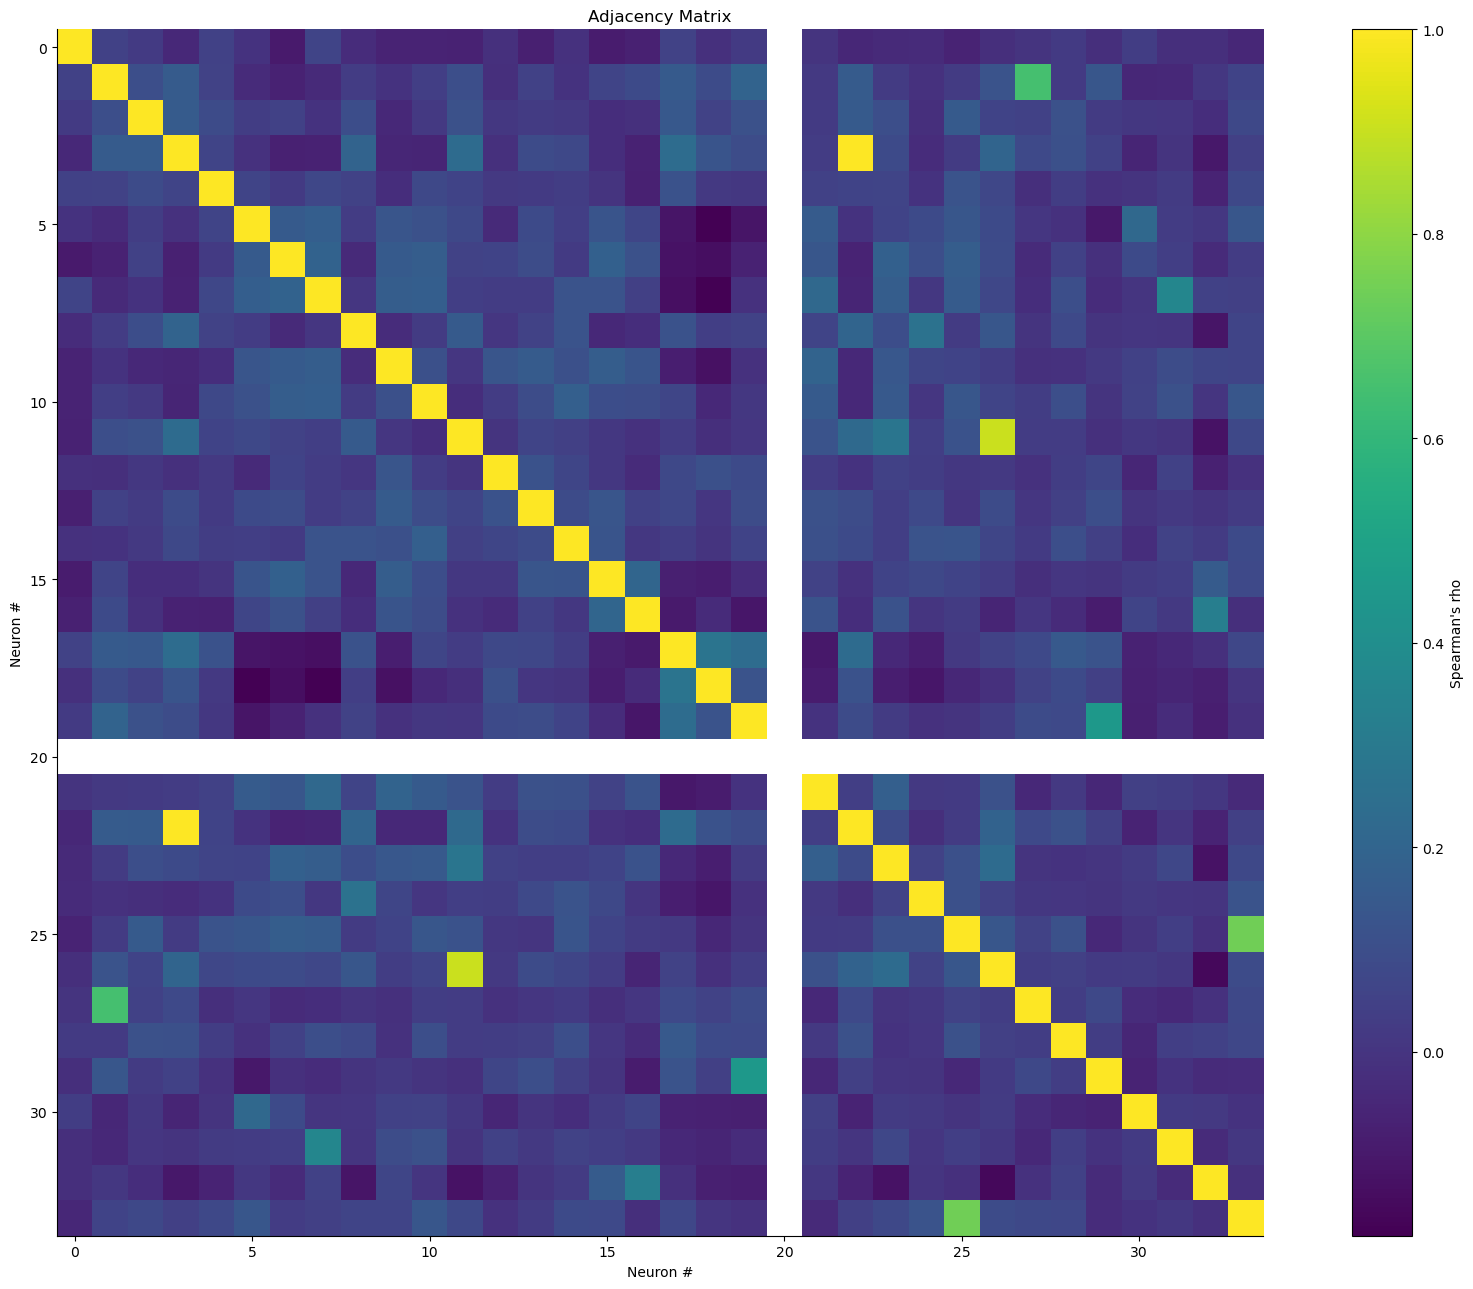

In [410]:
# Display the correlations
# Each square represents a "cell pair"
for i in range(len(traces)):
    fig2 = plt.figure()
    plt.imshow(corrs[i])
    plt.colorbar(label="Spearman's rho")
    plt.title("Adjacency Matrix")
    # Fix axis so that they don't show floats and start at 1 rather than 0
    plt.xlabel('Neuron #')
    plt.ylabel('Neuron #')

In [411]:
# Extrace mean values
lower_triangle = {}
mean_corr = {}
for i in range(len(traces)):
    lower_triangle[i] = np.tril(corrs[i])
    mean_corr[i] = np.mean(lower_triangle[i]) 

In [412]:
mean_corr

{0: 0.03725290066727539,
 1: 0.05882457827384446,
 2: 0.04001235587125907,
 3: 0.07211439543780773,
 4: 0.0600563333206001,
 5: 0.06475982265591963,
 6: 0.0420603160337783,
 7: 0.11060441965617666,
 8: 0.08077987666337424,
 9: 0.07819501386417951,
 10: 0.06770750734928571,
 11: 0.042740294417519524,
 12: 0.056332481930928185,
 13: 0.04731600975975159,
 14: 0.08309138361268342,
 15: 0.04870959949145903,
 16: 0.0821631550603351,
 17: 0.03458476703196466,
 18: 0.02937768110907788,
 19: 0.04418147564727311,
 20: 0.11022874997137451,
 21: 0.040544176696356814,
 22: 0.051713797244149214,
 23: 0.057813068526887244,
 24: 0.059606272578104774,
 25: 0.04588668884691573,
 26: 0.046547080913880774,
 27: 0.07169653199674371,
 28: 0.06920004245384777,
 29: 0.04313265201096501,
 30: 0.09052706083901893,
 31: 0.03180473868575143,
 32: 0.042719119403369615,
 33: nan}